# Proyecto ciencia de datos

## Expectativas stakeholder:
"El objetivo de esta entrega es dar inicio a la creación del tablero en Power BI, que permitirá integrar y visualizar toda la información disponible. La idea es que este tablero se convierta en una herramienta dinámica, que pueda ser alimentada continuamente en el futuro con nuevos datos que vayamos recopilando."

#### Comentarios adicionales:
"Podemos revisar pacientes con complicaciones, infecciones, sobrevida, y revisar grupos etarios.


## Insumos entregados a corte 25 de septiembre de 2025

* Cirugias_Hepaticas_consolidado.xlsx   (Higado)
* Cirugias_Pancreaticas_Consolidado.xlsx (Pancreas)
* Colecistectomias_Laparoscopicas_consolidado.xlsx  (Vesicula biliar) "extracción de la vesícula biliar mediante laparoscopia" "técnica mínimamente invasiva (no se abre el abdomen por completo, sino que se usan pequeñas incisiones y una cámara)." -- suelen ser mas comunes, 
* Otras_cirugias_consolidado.xlsx 
* Trasplante_hepático_consolidado.xlsx



## Etapa 1: Entendimiento de los datos

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 300)
np.set_printoptions(suppress=True)

In [2]:
# Lectura de los datos
df_trans_hepatico = pd.read_excel('data/Trasplante hepático consolidado - Original.xlsx')

In [3]:
# Revisión de tamaño e información del dataframe
print(df_trans_hepatico.shape)  
df_trans_hepatico.info()  
df_trans_hepatico.head(5)


(736, 285)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Columns: 285 entries, #_Paciente to Lugar_De_Recurrencia
dtypes: datetime64[ns](1), float64(185), int64(8), object(91)
memory usage: 1.6+ MB


,#_Paciente,Año_Tx,Mes_Tx#1,Fecha_Tx,Edad_Al_Tx,Sexo_Receptor,Código de anonimización,Fecha_nacimiento,EPS,Grupo_Sanguíneo_Receptor,RH_Receptor,COD_Grupo_Sanguíneo_Receptor,COD_RH_Receptor,Fecha-Enlistamiento,Tiempo_En_Lista_Días,Tiempo_En_Lista_Meses,Tiempo_En_Lista_Años,Causa_1_Tx_Hepático_,Causa_2_Tx_Hepático_,Hepatocarcinoma,Child_Pugh_Letra,MELD_Score,Causa_Tx_Renal,Peso_Pre_Tx,BMI,Composición_Corporal,Falla_Cardiaca_Pre_Tx,Enfermedad_Coronaria_Pre_Tx,Infarto_Cardiaco_Pre_Tx,Diabetes_Mellitus_Pre_Tx,Hipertensión_Arterial_Pre_Tx,Antecedente_De_Tabaquismo,Antecedente_De_Alcoholismo,Colesterol_TotalPre_Tx,LDL_Pre_Tx,HDL_Pre_Tx,Triglicéridos_Pre_Tx,Dislipidemia_Pre_Tx,MDRD_Score_Pre_Tx,MDRD_Categórico_PreTx,CMV_Receptor,EKG_PreQx,EKG_PreQx_Valor,Valvulopatía_Pre_Tx,Ecocardiograma_PreQx_FE%,Ecocardiograma_PreQx-FE_Cod,Ecocardiograma_PreQx_RC%,Ecocardiograma_PreQx_RC,Ecocardiograma_PreQxPSAP,Ecocardiograma_PreQx_Hipertensión_Pulmonar,Ecocardiograma_PreQx_TAPSE,Ecocardiograma_PreQx_TASVE,Ecocardiograma_PreQx_Disfunción_Diastólica,METS,Tx#1,Edad_Donante_Tx#1,Sexo_Donante_Tx#1,Causa_Muerte_Donante_Tx#1,CMV_Donante_Tx#1,Cirujano_Rescate_1_Tx#1,Cirujano_Rescate_2_Tx#1,Tipo_de_Cx-Trasplante_Tx#1,Trasplante_Combinado-Hígado-Riñón_Tx#1,Tiempo_Isquemia_Fría_Tx#1,Tiempo_Isquemia_Caliente_Tx#1,Arterialización_Portal,Injerto_Aórtico_Tx#1,#_Unidades_Glóbulos_Rojos_Tx#1,#_Unidades_Plasma_Fresco_Congelado_Tx#1,#_Unidades_Crioprecipitados_Tx#1,#_Unidades_Plaquetas_Tx#1,Tiempo_Quirúrgico_Tx#1,Antibiótico_Profiláctico_VS_Terapéutico,Días_Tratamiento_Antibiótico_Previo_A_Tx#1,Antibiótico_1__Tx#1,Antibiótico_2_Tx#1,Antibiótico_3_Tx#1,Antifúngico_Tx#1,Tiempo_De_Dosis_Hasta_Tx#1,Cirujano_Principal_Tx#1,Cirujano_Ayudante_Tx#1,Fecha_Colocación_Sonda_Vesical,Fecha_Retiro_Sonda_Vesical,Tiempo_Sonda_Vesical,Fecha_Colocación_CVC,Fecha_Retiro_CVC,Tiempo_CVC,Soporte_Vasopresor_PeriTx,Levosimendan_PeriTx,Levosimendam_Dosis,Noradrenalina_PeriTx,Noradrenalina_Dosis,Adrenalina_PeriTx,Andrenalina_Dois,Vasopresina_PeriTx,Vasopresina_Dosis,Dopamina_PeriTx,Dopamina_Dosis,Amiodarona_PeriTx,Amiodarona_Dosis,Tx_Soporte_Inotrópico,Bilirrubina_Total_POP,COD_ Bilirrubina_Total_POP,Bilirrubina_Directa_POP,COD_Bilirrubina_Directa,¿Complicación?,#_De_Complicaciones,Tipo_De_Complicación_1,Inmunosupresor_1,Inmunosupresor_2,Inmunosupresión_con_Anticuerpos,Rechazo_Agudo,Severidad_Rechazo_Agudo,Rechazo_Crónico,Infección_POP,Tipo_Infección_1,Germen_1,Fecha_Infección_1,Tiempo_Desde_Tx_Infección_1,Tipo_Infección_2,Germen_2,Fecha_Infección_2,Tiempo_Desde_Tx_Infección_2,Tipo_Infección_3,Germen_3,Fecha_Infección_3,Tiempo_Desde_Tx_Infección_3,Stent,Requirió_Reconstrucción_Biliar,Fecha_Reconstrucción_Biliar,Tiempo_Reconstrucción_Biliar,Profilaxis_Antitrombótica,Medicamento_Antitrombótica,Días_de_Profilaxis_Antitrombótica,Falla_Cardiaca_POP,Arritmia_POP,Infarto_POP,EKG_VALOR_POP,Ecocardiograma_POP_FE%,Ecocardiograma_POP_PASP,Ecocardiograma_POP_Otros,Retrasplante,Indicación_Retrasplante,Fecha-Enlistamiento_Tx#2,"Año_Tx2 (si no retx, poner año tx)",Fecha_Tx#2,Mes_Tx#2,Días_Reenlistado_Tx#2,Días_Desde_Tx#1,Edad_Donante_Tx#2,Sexo_Donante_Tx#2,Causa_Muerte_Donante_Tx#2,CMV_Donante_Tx#0,Cirujano_Rescate_1_Tx#2,Cirujano_Rescate_2_Tx#2,Tipo_de_Cx-Trasplante_Tx#2,Tiempo_Isquemia_Fría_Tx#2,Tiempo_Isquemia_Caliente_Tx#2,Injerto_Aórtico_Tx#2,#_Unidades_Glóbulos_Rojos_Tx#2,#_Unidades_Plasma_Fresco_Congelado_Tx#2,#_Unidades_Crioprecipitados_Tx#2,#_Unidades_Plaquetas_Tx#2,Tiempo_Quirúrgico_Tx#2,Días_Tratamiento_Antibiótico_Previo_A_Tx#2,Antibiótico_1_Tx#2,Antibiótico_2_Tx#2,Antibiótico_3_Tx#2,Antifúngico_Tx#2,Segunda_Dosis_Tx#2,Tiempo_De_Dosis_Hasta_Tx#2,Cirujano_Principal_Tx#2,Cirujano_Ayudante_Tx#2,Re_Re trasplante,Indicación_Re_Re_trasplante,Fecha-Enlistamiento_Tx#3,Año_Tx#3,Fecha_Tx#3,Mes_Tx#3,Días_Reenlistado_Tx#3,Días_Desde_Tx#1.1,Edad_Donante_Tx#3,Sexo_Donante_Tx#3,Causa_Muerte_Donante_Tx#3,CMV_Donante_Tx#3,Cirujano_Rescate_1_Tx#3,Cirujano_Rescate_2_Tx#3,Tipo_de_Cx-Trasplante_Tx#3,Tiempo_Isquemi

A partir del diccionario y al revisar el comportamiento del dataframe, podemos concluir que los valores de 9999 corresponden a datos nulos, <span style="color:red">se remplazaran con el fin de realizar un calculo mas preciso de completitud de la información </span>

In [4]:
df_trans_hepatico.replace([9999, 9999.0, '9999',999,99999,'8888.0',8888.0,'889.0',889.0], np.nan, inplace=True)
df_trans_hepatico.info()  
df_trans_hepatico.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Columns: 285 entries, #_Paciente to Lugar_De_Recurrencia
dtypes: datetime64[ns](14), float64(187), int64(6), object(78)
memory usage: 1.6+ MB


C:\Users\jarat\AppData\Local\Temp\ipykernel_7504\1564531445.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_trans_hepatico.replace([9999, 9999.0, '9999',999,99999,'8888.0',8888.0,'889.0',889.0], np.nan, inplace=True)


,#_Paciente,Año_Tx,Mes_Tx#1,Fecha_Tx,Edad_Al_Tx,Sexo_Receptor,Código de anonimización,Fecha_nacimiento,EPS,Grupo_Sanguíneo_Receptor,RH_Receptor,COD_Grupo_Sanguíneo_Receptor,COD_RH_Receptor,Fecha-Enlistamiento,Tiempo_En_Lista_Días,Tiempo_En_Lista_Meses,Tiempo_En_Lista_Años,Causa_1_Tx_Hepático_,Causa_2_Tx_Hepático_,Hepatocarcinoma,Child_Pugh_Letra,MELD_Score,Causa_Tx_Renal,Peso_Pre_Tx,BMI,Composición_Corporal,Falla_Cardiaca_Pre_Tx,Enfermedad_Coronaria_Pre_Tx,Infarto_Cardiaco_Pre_Tx,Diabetes_Mellitus_Pre_Tx,Hipertensión_Arterial_Pre_Tx,Antecedente_De_Tabaquismo,Antecedente_De_Alcoholismo,Colesterol_TotalPre_Tx,LDL_Pre_Tx,HDL_Pre_Tx,Triglicéridos_Pre_Tx,Dislipidemia_Pre_Tx,MDRD_Score_Pre_Tx,MDRD_Categórico_PreTx,CMV_Receptor,EKG_PreQx,EKG_PreQx_Valor,Valvulopatía_Pre_Tx,Ecocardiograma_PreQx_FE%,Ecocardiograma_PreQx-FE_Cod,Ecocardiograma_PreQx_RC%,Ecocardiograma_PreQx_RC,Ecocardiograma_PreQxPSAP,Ecocardiograma_PreQx_Hipertensión_Pulmonar,Ecocardiograma_PreQx_TAPSE,Ecocardiograma_PreQx_TASVE,Ecocardiograma_PreQx_Disfunción_Diastólica,METS,Tx#1,Edad_Donante_Tx#1,Sexo_Donante_Tx#1,Causa_Muerte_Donante_Tx#1,CMV_Donante_Tx#1,Cirujano_Rescate_1_Tx#1,Cirujano_Rescate_2_Tx#1,Tipo_de_Cx-Trasplante_Tx#1,Trasplante_Combinado-Hígado-Riñón_Tx#1,Tiempo_Isquemia_Fría_Tx#1,Tiempo_Isquemia_Caliente_Tx#1,Arterialización_Portal,Injerto_Aórtico_Tx#1,#_Unidades_Glóbulos_Rojos_Tx#1,#_Unidades_Plasma_Fresco_Congelado_Tx#1,#_Unidades_Crioprecipitados_Tx#1,#_Unidades_Plaquetas_Tx#1,Tiempo_Quirúrgico_Tx#1,Antibiótico_Profiláctico_VS_Terapéutico,Días_Tratamiento_Antibiótico_Previo_A_Tx#1,Antibiótico_1__Tx#1,Antibiótico_2_Tx#1,Antibiótico_3_Tx#1,Antifúngico_Tx#1,Tiempo_De_Dosis_Hasta_Tx#1,Cirujano_Principal_Tx#1,Cirujano_Ayudante_Tx#1,Fecha_Colocación_Sonda_Vesical,Fecha_Retiro_Sonda_Vesical,Tiempo_Sonda_Vesical,Fecha_Colocación_CVC,Fecha_Retiro_CVC,Tiempo_CVC,Soporte_Vasopresor_PeriTx,Levosimendan_PeriTx,Levosimendam_Dosis,Noradrenalina_PeriTx,Noradrenalina_Dosis,Adrenalina_PeriTx,Andrenalina_Dois,Vasopresina_PeriTx,Vasopresina_Dosis,Dopamina_PeriTx,Dopamina_Dosis,Amiodarona_PeriTx,Amiodarona_Dosis,Tx_Soporte_Inotrópico,Bilirrubina_Total_POP,COD_ Bilirrubina_Total_POP,Bilirrubina_Directa_POP,COD_Bilirrubina_Directa,¿Complicación?,#_De_Complicaciones,Tipo_De_Complicación_1,Inmunosupresor_1,Inmunosupresor_2,Inmunosupresión_con_Anticuerpos,Rechazo_Agudo,Severidad_Rechazo_Agudo,Rechazo_Crónico,Infección_POP,Tipo_Infección_1,Germen_1,Fecha_Infección_1,Tiempo_Desde_Tx_Infección_1,Tipo_Infección_2,Germen_2,Fecha_Infección_2,Tiempo_Desde_Tx_Infección_2,Tipo_Infección_3,Germen_3,Fecha_Infección_3,Tiempo_Desde_Tx_Infección_3,Stent,Requirió_Reconstrucción_Biliar,Fecha_Reconstrucción_Biliar,Tiempo_Reconstrucción_Biliar,Profilaxis_Antitrombótica,Medicamento_Antitrombótica,Días_de_Profilaxis_Antitrombótica,Falla_Cardiaca_POP,Arritmia_POP,Infarto_POP,EKG_VALOR_POP,Ecocardiograma_POP_FE%,Ecocardiograma_POP_PASP,Ecocardiograma_POP_Otros,Retrasplante,Indicación_Retrasplante,Fecha-Enlistamiento_Tx#2,"Año_Tx2 (si no retx, poner año tx)",Fecha_Tx#2,Mes_Tx#2,Días_Reenlistado_Tx#2,Días_Desde_Tx#1,Edad_Donante_Tx#2,Sexo_Donante_Tx#2,Causa_Muerte_Donante_Tx#2,CMV_Donante_Tx#0,Cirujano_Rescate_1_Tx#2,Cirujano_Rescate_2_Tx#2,Tipo_de_Cx-Trasplante_Tx#2,Tiempo_Isquemia_Fría_Tx#2,Tiempo_Isquemia_Caliente_Tx#2,Injerto_Aórtico_Tx#2,#_Unidades_Glóbulos_Rojos_Tx#2,#_Unidades_Plasma_Fresco_Congelado_Tx#2,#_Unidades_Crioprecipitados_Tx#2,#_Unidades_Plaquetas_Tx#2,Tiempo_Quirúrgico_Tx#2,Días_Tratamiento_Antibiótico_Previo_A_Tx#2,Antibiótico_1_Tx#2,Antibiótico_2_Tx#2,Antibiótico_3_Tx#2,Antifúngico_Tx#2,Segunda_Dosis_Tx#2,Tiempo_De_Dosis_Hasta_Tx#2,Cirujano_Principal_Tx#2,Cirujano_Ayudante_Tx#2,Re_Re trasplante,Indicación_Re_Re_trasplante,Fecha-Enlistamiento_Tx#3,Año_Tx#3,Fecha_Tx#3,Mes_Tx#3,Días_Reenlistado_Tx#3,Días_Desde_Tx#1.1,Edad_Donante_Tx#3,Sexo_Donante_Tx#3,Causa_Muerte_Donante_Tx#3,CMV_Donante_Tx#3,Cirujano_Rescate_1_Tx#3,Cirujano_Rescate_2_Tx#3,Tipo_de_Cx-Trasplante_Tx#3,Tiempo_Isquemi

### Dado que tenemos muchas variables, para facilitar el entendimiento de los datos a cada variable se le da una categoria.

In [5]:
# Diccionario de categorías

cols = df_trans_hepatico.columns.tolist()
df_vars = pd.DataFrame({'Variable': cols})

categorias = {
    'Identificación del paciente': ['#_Paciente',	'Edad_Al_Tx',	'Sexo_Receptor',
    'Código de anonimización ',	'Fecha_nacimiento',	'EPS',	'Grupo_Sanguíneo_Receptor',	'RH_Receptor',	
    'COD_Grupo_Sanguíneo_Receptor',	'COD_RH_Receptor',	'Fecha-Enlistamiento',
    'Tiempo_En_Lista_Días',	'Tiempo_En_Lista_Meses',	'Tiempo_En_Lista_Años',	
    'BMI',	'Composición_Corporal',	'Enfermedad_Coronaria_Pre_Tx',	
    'Edad_Donante_Tx#1',	'Sexo_Donante_Tx#1',	'Edad_Donante_Tx#2',
    'Sexo_Donante_Tx#2',	'Edad_Donante_Tx#3',	'Sexo_Donante_Tx#3'
    ],

    'Trasplante y cirugía': ['Año_Tx',	'Mes_Tx#1',	'Fecha_Tx',	'Causa_1_Tx_Hepático_',
    'Causa_2_Tx_Hepático_',	'Causa_Tx_Renal',	'Peso_Pre_Tx',	'Falla_Cardiaca_Pre_Tx',	
    'Infarto_Cardiaco_Pre_Tx',	'Diabetes_Mellitus_Pre_Tx',	'Hipertensión_Arterial_Pre_Tx',	
    'Colesterol_TotalPre_Tx',	'LDL_Pre_Tx',	'HDL_Pre_Tx',	'Triglicéridos_Pre_Tx',	
    'Dislipidemia_Pre_Tx',	'MDRD_Score_Pre_Tx',	'MDRD_Categórico_PreTx',	
    'Valvulopatía_Pre_Tx',	'Tx#1',	'Causa_Muerte_Donante_Tx#1',	'CMV_Donante_Tx#1',
    'Cirujano_Rescate_1_Tx#1',	'Cirujano_Rescate_2_Tx#1',	'Tipo_de_Cx-Trasplante_Tx#1',	
    'Trasplante_Combinado-Hígado-Riñón_Tx#1',	'Tiempo_Isquemia_Fría_Tx#1',	
    'Tiempo_Isquemia_Caliente_Tx#1',	'Arterialización_Portal',	'Injerto_Aórtico_Tx#1',	
    '#_Unidades_Glóbulos_Rojos_Tx#1',	'#_Unidades_Plasma_Fresco_Congelado_Tx#1',	
    '#_Unidades_Crioprecipitados_Tx#1',	'#_Unidades_Plaquetas_Tx#1',	
    'Tiempo_Quirúrgico_Tx#1',	'Antibiótico_Profiláctico_VS_Terapéutico',	
    'Días_Tratamiento_Antibiótico_Previo_A_Tx#1',	'Antibiótico_1__Tx#1',	'Antibiótico_2_Tx#1',	
    'Antibiótico_3_Tx#1',	'Antifúngico_Tx#1',	'Tiempo_De_Dosis_Hasta_Tx#1',	'Cirujano_Principal_Tx#1',	
    'Cirujano_Ayudante_Tx#1',	'Fecha_Colocación_Sonda_Vesical',	'Fecha_Colocación_CVC',	
    'Soporte_Vasopresor_PeriTx',	'Levosimendan_PeriTx ',	'Levosimendam_Dosis',	
    'Noradrenalina_PeriTx',	'Noradrenalina_Dosis',	'Adrenalina_PeriTx',	
    'Vasopresina_PeriTx',	'Vasopresina_Dosis',	'Dopamina_PeriTx',	'Dopamina_Dosis',	
    'Amiodarona_PeriTx',	'Amiodarona_Dosis',	'Tx_Soporte_Inotrópico',	
    'Retrasplante',	'Indicación_Retrasplante',	'Fecha-Enlistamiento_Tx#2',	
    'Año_Tx2 (si no retx, poner año tx)',	'Fecha_Tx#2',	'Mes_Tx#2',	'Días_Reenlistado_Tx#2',	
    'Días_Desde_Tx#1',	'Causa_Muerte_Donante_Tx#2',	'CMV_Donante_Tx#0',	'Cirujano_Rescate_1_Tx#2',	
    'Cirujano_Rescate_2_Tx#2',	'Tipo_de_Cx-Trasplante_Tx#2',	'Tiempo_Isquemia_Fría_Tx#2',	'Tiempo_Isquemia_Caliente_Tx#2',	
    'Injerto_Aórtico_Tx#2',	'#_Unidades_Glóbulos_Rojos_Tx#2',	'#_Unidades_Plasma_Fresco_Congelado_Tx#2',	
    '#_Unidades_Crioprecipitados_Tx#2',	'#_Unidades_Plaquetas_Tx#2',	'Tiempo_Quirúrgico_Tx#2',	
    'Días_Tratamiento_Antibiótico_Previo_A_Tx#2',	'Antibiótico_1_Tx#2',	'Antibiótico_2_Tx#2',	
    'Antibiótico_3_Tx#2',	'Antifúngico_Tx#2',	'Segunda_Dosis_Tx#2',	'Tiempo_De_Dosis_Hasta_Tx#2',	
    'Cirujano_Principal_Tx#2',	'Cirujano_Ayudante_Tx#2',	'Re_Re trasplante',	'Indicación_Re_Re_trasplante',	
    'Fecha-Enlistamiento_Tx#3',	'Año_Tx#3',	'Fecha_Tx#3',	'Mes_Tx#3',	'Días_Reenlistado_Tx#3',	'Días_Desde_Tx#1',	'Causa_Muerte_Donante_Tx#3',	
    'CMV_Donante_Tx#3',	'Cirujano_Rescate_1_Tx#3',	'Cirujano_Rescate_2_Tx#3',	'Tipo_de_Cx-Trasplante_Tx#3',	'Tiempo_Isquemia_Fría_Tx#3',	'Tiempo_Isquemia_Caliente_Tx#3',	
    'Injerto_Aórtico_Tx#3',	'#_Unidades_Glóbulos_Rojos_Tx#3',	'#_Unidades_Plasma_Fresco_Congelado_Tx#3',	'#_Unidades_Crioprecipitados_Tx#3',	'#_Unidades_Plaquetas_Tx#3',	
    'Tiempo_Quirúrgico_Tx#3',	'Cirujano_Principal_Tx#3',	'Cirujano_Ayudante_Tx#3',	'Años_Desde_El_Tx',	'Fecha_Tx_A_PTLD',	'Tiempo_Tx_A_PTLD',	'Neoplasia_PostTx',	'Fecha_Neoplasia_PostTx',	
    'Tiempo_Tx_A_Neoplasia_PostTx',	'Fecha_última_Terapia_Local_PreTx',	'αFP_PreTx',	'Ca-19-9_PreTx',	'Neutrófilos_PreTx',	'Plaquetas_PreTx',	'Linfocitos_PreTx',	'αFP_1m_PostTx',	
    'αFP_6m_PostTx',	'αFP_1año_PostTx'
    ],

    'Hepatocarcinoma y cáncer': ['Hepatocarcinoma',	'Hepatocarcinoma',	'αFP_Al_Dx',	'#_Nódulos_Al_Dx',	'Diámetro_Nódulo_Principal_(cm)_Al_Dx',	
    'Sumatoria_#Nódulos_y_Diámetros_Al_Dx',	'Cumple_Milán',	'Cumple_UCSF',	'Cumple_Up_To_Seven',	'Terapia_Local_1',	'Terapia_Local_2',	'#_Sesiones',	'Patrón_Histológico',
    'Grado_HCC',	'Invasión_Vascular',	'Trombosis_Porta_Tumoral',	'Invasión_Linfática',	'Invasión_Nerviosa',	'Necrosis_Tumoral',	'#Nódulos_Viables',	'Diámetro_Tumor_Viable_Más_Grande_Patología',
    'Sumatoria_Nódulos_Viables_y_Diámetro_Tumor_Más_Grande_Patología',	'Ki67',	'Mitosis',	'p53',	'αFP_Patología',	'T',	'N',	'M',	'Estadio',

    ],

    'Scores clínicos': ['Child_Pugh_Letra',	'MELD_Score',	'PREMORAL_Valor',	'PREMORAL_Categoría',	'POSTMORAL_Valor',	'POSTMORAL_Categoría',	'RETREAT_Valor',	'COMBOMORAL_Valor',	'COMBOMORAL_Categoría'
    ],

    'Comorbilidades y antecedentes': ['Antecedente_De_Tabaquismo',	'Antecedente_De_Alcoholismo',	'Ecocardiograma_PreQx_Hipertensión_Pulmonar',	'Andrenalina_Dois',	'Falla_Cardiaca_POP'
    ],

    'Evaluaciones diagnósticas': ['CMV_Receptor',	'EKG_PreQx',	'EKG_PreQx_Valor',	'Ecocardiograma_PreQx_FE%',	'Ecocardiograma_PreQx-FE_Cod',	'Ecocardiograma_PreQx_RC%',	'Ecocardiograma_PreQx_RC',	
    'Ecocardiograma_PreQxPSAP',	'Ecocardiograma_PreQx_TAPSE ',	'Ecocardiograma_PreQx_TASVE',	'Ecocardiograma_PreQx_Disfunción_Diastólica',	'METS',	'EKG_VALOR_POP',	'Ecocardiograma_POP_FE%',	
    'Ecocardiograma_POP_PASP',	'Ecocardiograma_POP_Otros',	'NLR',	'PLR'
    ],

    'Seguimiento y sobrevida': [
       'Fecha_Retiro_Sonda_Vesical',	'Tiempo_Sonda_Vesical',	'Fecha_Retiro_CVC',	'Tiempo_CVC',	'Días_de_Profilaxis_Antitrombótica',	'Días_En_Hospitalización_Piso',	'Días_Totales_Intrahospitalarios',	'Vivo_Hoy',	'Fecha_Control/Muerte',	'Sobrevida_Días',	'Sobrevida_Meses',	'Sobrevida_Años',	'Último_Análisis_De_Mortalidad',	'Causa_De_Muerte',	'Sobrevida_Injerto_#1',	'Control_Injerto_#1',	'Días_Sobrevida_Injerto_#1',	'Meses_Sobrevida_Injerto_#1',	'Años_Sobrevida_Injerto_#1',	'Sobrevida_Injerto_#2',	'Control_Injerto_#2',	'Días_Sobrevida_Injerto_#2',	'Meses_Sobrevida_Injerto_#2',	'Años_Sobrevida_Injerto_#2',	'Sobrevida_Injerto_#3',	'Control_Injerto_#3',	'Días_Sobrevida_Injerto_#3',	'Meses_Sobrevida_Injerto_#3',	'Años_Sobrevida_Injerto_#3',	'PTLD',	'Recurrencia_ HCC',	'Fecha_Recurrencia',	'Lugar_De_Recurrencia',

    ],

    'Postoperatorio y complicaciones': ['Bilirrubina_Total_POP',	'COD_ Bilirrubina_Total_POP',	'Bilirrubina_Directa_POP',	'COD_Bilirrubina_Directa',	'¿Complicación?',	'#_De_Complicaciones',	'Tipo_De_Complicación_1',
    'Inmunosupresor_1',	'Inmunosupresor_2',	'Inmunosupresión_con_Anticuerpos',	'Rechazo_Agudo',	'Severidad_Rechazo_Agudo',	'Rechazo_Crónico',	'Infección_POP',	'Tipo_Infección_1',	'Germen_1',	'Fecha_Infección_1',
    'Tiempo_Desde_Tx_Infección_1',	'Tipo_Infección_2',	'Germen_2',	'Fecha_Infección_2',	'Tiempo_Desde_Tx_Infección_2',	'Tipo_Infección_3',	'Germen_3',	'Fecha_Infección_3',	'Tiempo_Desde_Tx_Infección_3',	'Stent',
    'Requirió_Reconstrucción_Biliar',	'Fecha_Reconstrucción_Biliar',	'Tiempo_Reconstrucción_Biliar',	'Profilaxis_Antitrombótica',	'Medicamento_Antitrombótica',	'Arritmia_POP',	'Infarto_POP',	'Fast_Track',	
    'Días_En_UCI',	'Fecha_Egreso_UCI ',	'Fecha_Egreso_Hospitalario',	'Sobrevida_PeriQx_30_días_POP',	'Complicación_Asociada'
    ]
}

def clasificar_variable(var):
    for categoria, palabras in categorias.items():
        if var in palabras:
            return categoria
    return 'Otras / No clasificadas'


df_vars['Categoría'] = df_vars['Variable'].apply(clasificar_variable)

# Vista general
df_vars.groupby('Categoría').size().sort_values(ascending=False)

df_vars.to_excel('clasificacion_variables_df_trans_hepatico.xlsx', index=False)



## Etapa 2: Limpieza y enriquecimiento del dataset


### Complicaciones

In [6]:
# 2️⃣ Pasar los textos equivalentes a "sin complicación" a 0
df_trans_hepatico["¿Complicación?"].replace(["NO", "N0", "NINGUNA", "NINGUNO", "NADA"], 0, inplace=True)

# 3️⃣ Todo lo demás (que no sea 0 ni NaN) se vuelve 1
df_trans_hepatico["¿Complicación?"] = df_trans_hepatico["¿Complicación?"].apply(
    lambda x: 1 if not pd.isna(x) and x != 0 else 0
)
df_trans_hepatico["¿Complicación?"].value_counts()

C:\Users\jarat\AppData\Local\Temp\ipykernel_7504\1334801625.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trans_hepatico["¿Complicación?"].replace(["NO", "N0", "NINGUNA", "NINGUNO", "NADA"], 0, inplace=True)


¿Complicación?
0    422
1    314
Name: count, dtype: int64

### Inmunosupresión_con_Anticuerpos

In [7]:
df_trans_hepatico["Inmunosupresión_con_Anticuerpos"].value_counts()


Inmunosupresión_con_Anticuerpos
0.0    172
1.0     55
2.0      1
Name: count, dtype: int64

In [8]:
# tuvo tratamiento con anticuerpos 
df_trans_hepatico["Inmunosupresión_con_Anticuerpos"].value_counts()

def clasificar_inmunosupresion(valor):
    if pd.isna(valor):
        return np.nan
    elif valor in [1, 2]:
        return "SI"
    else:
        return "NO"

df_trans_hepatico["Tuvo_Inmunosupresión_con_Anticuerpos"] = df_trans_hepatico["Inmunosupresión_con_Anticuerpos"].apply(clasificar_inmunosupresion)

df_trans_hepatico["Tuvo_Inmunosupresión_con_Anticuerpos"].value_counts()


Tuvo_Inmunosupresión_con_Anticuerpos
NO    172
SI     56
Name: count, dtype: int64

### Fecha_Infeccion_1

In [9]:
df_trans_hepatico["Fecha_Infección_1"].value_counts()

# Reemplazar la fecha específica por NaN
df_trans_hepatico['Fecha_Infección_1'] = df_trans_hepatico['Fecha_Infección_1'].replace(
    {pd.Timestamp('1927-05-17'): np.nan, pd.Timestamp('1902-09-25'): np.nan}
)

df_trans_hepatico["Fecha_Infección_1"].describe()


count          236
unique         145
top       00:00:00
freq            91
Name: Fecha_Infección_1, dtype: object

In [10]:
df_trans_hepatico["Fecha_Tx"].describe()

count                              736
mean     2014-03-29 23:32:36.521739008
min                1988-06-02 00:00:00
25%                2009-09-17 00:00:00
50%                2014-12-03 00:00:00
75%                2019-01-16 18:00:00
max                2025-03-29 00:00:00
Name: Fecha_Tx, dtype: object

### Tiempo_Desde_Tx_Infección_1

In [11]:
# df_trans_hepatico["Tiempo_Desde_Tx_Infección_1"].unique()
# df_trans_hepatico["Tiempo_Desde_Tx_Infección_1"].dropna().astype(int).unique()

# Convertir ambas columnas a datetime
df_trans_hepatico["Fecha_Infección_1"] = pd.to_datetime(df_trans_hepatico["Fecha_Infección_1"], errors='coerce')
df_trans_hepatico["Fecha_Tx"] = pd.to_datetime(df_trans_hepatico["Fecha_Tx"], errors='coerce')

# Ahora sí puedes restar fechas
df_trans_hepatico["Tiempo_Desde_Tx_Infección_1"] = (
    df_trans_hepatico["Fecha_Infección_1"] - df_trans_hepatico["Fecha_Tx"]
).dt.days

df_trans_hepatico["Tiempo_Desde_Tx_Infección_1"] = df_trans_hepatico["Tiempo_Desde_Tx_Infección_1"].astype("Int64")
df_trans_hepatico["Tiempo_Desde_Tx_Infección_1"].unique()


<IntegerArray>
[<NA>,    8,   64,   21,   37,  250,  111,    4,    7,   58,    9,   22,   31,
   20,   55,  102,   14,   24,   10,   35,   28,   19,   16,    5,    3,   18,
   12,    6,   11,   13,   48,   78,    1,   38,   25,   26,   15,   17,   36,
   42,    2,   29,   23,   70,   43,   52,   74,   41,   44, -262,  -56,    0,
  173,  121,   34,   57,   72]
Length: 57, dtype: Int64

In [12]:
df_trans_hepatico["Tiempo_Desde_Tx_Infección_1"].describe()


count        145.0
mean     20.165517
std      39.751138
min         -262.0
25%            7.0
50%           12.0
75%           24.0
max          250.0
Name: Tiempo_Desde_Tx_Infección_1, dtype: Float64

Dado que es una variable caclulada a partir de la fecha del transplante y la fecha en la que se reporta una infección, no es coherente tener valores negativos, <span style="color:red"> por lo cual se toman como valores errados y se pasan a nan </span>

In [13]:
# Convertir a float para que los nulos sean np.nan y se puedan evaluar
df_trans_hepatico["Tiempo_Desde_Tx_Infección_1"] = df_trans_hepatico["Tiempo_Desde_Tx_Infección_1"].astype(float)

# Reemplazar valores negativos por np.nan
df_trans_hepatico["Tiempo_Desde_Tx_Infección_1"] = np.where(
    df_trans_hepatico["Tiempo_Desde_Tx_Infección_1"] < 0,
    np.nan,
    df_trans_hepatico["Tiempo_Desde_Tx_Infección_1"]
)

df_trans_hepatico["Tiempo_Desde_Tx_Infección_1"].describe()

count    143.000000
mean      22.671329
std       31.536426
min        0.000000
25%        7.000000
50%       12.000000
75%       24.000000
max      250.000000
Name: Tiempo_Desde_Tx_Infección_1, dtype: float64

### Falla_Cardiaca_POP

In [14]:
df_trans_hepatico["Falla_Cardiaca_POP"].value_counts()

df_trans_hepatico["Falla_Cardiaca_POP_bool"] = df_trans_hepatico["Falla_Cardiaca_POP"].replace({0: False, 1: True})

df_trans_hepatico["Falla_Cardiaca_POP_bool"].value_counts()



Falla_Cardiaca_POP_bool
False    610
True      13
Name: count, dtype: int64

### Arritmia_POP

In [15]:
df_trans_hepatico[["Arritmia_POP"]].describe()
df_trans_hepatico[["Arritmia_POP"]].value_counts()


Arritmia_POP                                                                                                                                                                                                         
0                                                                                                                                                                                                                        544
1                                                                                                                                                                                                                         36
3                                                                                                                                                                                                                          8
TAQUICARDIA SINUSAL                                                                                                        

In [16]:
# Supongamos que la columna se llama 'arritmia_pop'
df_trans_hepatico['Arritmia_pop_limpia'] = df_trans_hepatico['Arritmia_POP'].astype(str).str.upper().str.strip()

def clasificar_arritmia(texto):
    if texto in ['0', 'NO', 'N/A', 'NINGUNA']:
        return 0
    # Bradiarritmias
    elif any(x in texto for x in ['BRADI', 'ASISTOLIA', 'RITMO DE ESCAPE', 'AESP', 'PARO']):
        return 3
    # Taquiarritmias ventriculares
    elif any(x in texto for x in ['VENTRICULAR', 'FV', 'FIBRILACION VENTRICULAR', 'BIGEMINISMO']):
        return 2
    # Taquiarritmias supraventriculares
    elif any(x in texto for x in ['SUPRAVENT', 'FA ', 'FIBRILACION AURICULAR', 'TAQUICARDIA SINUSAL']):
        return 1
    # Casos dudosos o combinaciones múltiples
    elif any(c in texto for c in ['+', '/', 'Y']):
        # Si menciona taqui + bradi, podría marcarse como 1 (predomina taqui) o np.nan
        return np.nan
    else:
        return np.nan

df_trans_hepatico['arritmia_pop_cod'] = df_trans_hepatico['Arritmia_pop_limpia'].apply(clasificar_arritmia)

df_trans_hepatico["arritmia_pop_cod"].value_counts()


arritmia_pop_cod
0.0    544
3.0     12
1.0      7
2.0      5
Name: count, dtype: int64

In [17]:
df_trans_hepatico["arritmia_pop_descripcion"] = (
    df_trans_hepatico["arritmia_pop_cod"]
    .map({0: "NO", 1: "TAQUIARRITMIA SUPRAVENTRICULAR", 2: "TAQUIARRITMIA VENTRICULAR", 3: "BRADIARRITMIA"})
    .fillna("NO")  # o np.nan si prefieres conservar los nulos
)
df_trans_hepatico['arritmia_pop_descripcion'].value_counts()
df_trans_hepatico['arritmia_pop_descripcion'].unique()

array(['NO', 'BRADIARRITMIA', 'TAQUIARRITMIA SUPRAVENTRICULAR',
       'TAQUIARRITMIA VENTRICULAR'], dtype=object)

### Infarto_POP

In [18]:
#df_trans_hepatico[["Infarto_POP"]].describe()
df_trans_hepatico[["Infarto_POP"]].value_counts()

def limpiar_infarto_pop(texto):
    if pd.isna(texto):
        return np.nan
    texto = str(texto).strip().upper()
    
    if texto in ['0','0.0', 'NO', 'N/A', 'NINGUNA']:
        return 0
    elif texto in ['1', '1.0','SI', 'SÍ']:
        return 1
    else:
        return np.nan

df_trans_hepatico['Infarto_POP'] = df_trans_hepatico['Infarto_POP'].apply(limpiar_infarto_pop)

df_trans_hepatico['Infarto_POP'].value_counts(dropna=False)


Infarto_POP
0.0    621
NaN    111
1.0      4
Name: count, dtype: int64

In [19]:
df_trans_hepatico["Infarto_POP_bool"] = df_trans_hepatico["Infarto_POP"].replace({0: False, 1: True})
df_trans_hepatico["Infarto_POP_bool"].value_counts(dropna=False)

Infarto_POP_bool
False    621
NaN      111
True       4
Name: count, dtype: int64

### EKG_VALOR_POP

In [20]:
df_trans_hepatico["EKG_VALOR_POP"].describe()

count     168
unique     35
top         0
freq      119
Name: EKG_VALOR_POP, dtype: int64

In [21]:
df_trans_hepatico["EKG_VALOR_POP"].unique()
df_trans_hepatico["EKG_VALOR_POP"].value_counts()


EKG_VALOR_POP
0                                    119
TAQUICARDIA SINUSAL                    5
RITMO SINUSAL                          5
1                                      3
FA                                     2
                                    ... 
TAQUIARDIA SINUSAL                     1
INVERSION T EN VI / NORMAL             1
FIBRILACION AURICULAR PAROXISTICA      1
BLOQUEO AV III GRADO                   1
FIBRILACIÓN AURICULAR                  1
Name: count, Length: 35, dtype: int64

In [22]:

def clasificar_ekg(valor):
    if pd.isna(valor) or valor.strip() in ['999', '']:
        return np.nan
    
    v = valor.upper()
    
    # Normal
    if any(x in v for x in ['0','NORMAL', 'RITMO SINUSAL', 'SIN CAMBIOS', 'SIN ALTERACIONES']):
        return 0
    
    # QTc prolongado
    elif 'QT' in v and any(x in v for x in ['1','PROLONG', 'QTC 5']):
        return 1
    
    # Trastornos de la repolarización
    elif any(x in v for x in ['2','REPOLAR', 'ONDA T', 'LESION', 'ISQUEM', 'ALTERACION INESPECIFICA']):
        return 2
    
    # Taquiarritmias supraventriculares
    elif any(x in v for x in ['3','TAQUICARDIA SINUSAL', 'TAQUIARDIA', 'FA ', 'FIBRILACION AURIC', 'FLUTTER', 'SUPRAVENTRICULAR']):
        return 3
    
    # Taquiarritmias ventriculares
    elif any(x in v for x in ['4','TAQUICARDIA VENTRICULAR', 'FIBRILACION VENTRICULAR']):
        return 4
    
    # Bradiarritmias
    elif any(x in v for x in ['5','BRADICARD', 'ASISTOL', 'BLOQUEO AV']):
        return 5
    
    # Extrasístoles
    elif 'EXTRASIST' in v or 'BIGEMINISMO' in v or '6' in v:
        return 6
    
    # Mala progresión de onda R
    elif 'ONDA R' in v or 'PROGRESION LENTA' in v or '7' in v:
        return 7
    
    # Bloqueo de rama derecha
    elif 'BLOQUEO DE RAMA DERECHA' in v or '8'in v:
        return 8
    
    # Bloqueo de rama izquierda
    elif 'BLOQUEO DE RAMA IZQ' in v or '9' in v:
        return 9
    
    else:
        return np.nan


# Aplicar
df_trans_hepatico['EKG_VALOR_POP_1'] = df_trans_hepatico['EKG_VALOR_POP'].astype(str).apply(clasificar_ekg)

# Ver resultado
df_trans_hepatico['EKG_VALOR_POP_1'].value_counts(dropna=False)

EKG_VALOR_POP_1
NaN    577
0.0    141
3.0     13
2.0      3
5.0      1
6.0      1
Name: count, dtype: int64

In [23]:
df_trans_hepatico["EKG_VALOR_POP_categoria"] = df_trans_hepatico["EKG_VALOR_POP_1"].replace({0: 'Normal', 1: 'QTc prolongado', 2: 'Trastornos de la repolarización', 
                                                                                             3: 'Taquiarritmias supraventriculares', 4: 'Taquiarritmias ventriculares', 
                                                                                             5: 'Bradiarritmias', 6: 'Extrasístoles', 7: 'Mala progresión de onda R',
                                                                                             8: 'Bloqueo de rama derecha', 9: 'Bloqueo de rama izquierda'})

df_trans_hepatico["EKG_VALOR_POP_categoria"].value_counts()


EKG_VALOR_POP_categoria
Normal                               141
Taquiarritmias supraventriculares     13
Trastornos de la repolarización        3
Bradiarritmias                         1
Extrasístoles                          1
Name: count, dtype: int64

In [24]:
df_trans_hepatico[["EKG_VALOR_POP_categoria","Ecocardiograma_POP_FE%","Ecocardiograma_POP_PASP","Ecocardiograma_POP_Otros"]].loc[df_trans_hepatico["EKG_VALOR_POP_categoria"].isin(['Normal'])].describe()

,Ecocardiograma_POP_FE%,Ecocardiograma_POP_PASP
count,118.000000,117.000000
mean,4.686441,1.589744
std,16.833879,8.464076
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,85.000000,72.000000


In [25]:
df_trans_hepatico[["EKG_VALOR_POP_categoria","Ecocardiograma_POP_FE%","Ecocardiograma_POP_PASP","Ecocardiograma_POP_Otros"]].loc[df_trans_hepatico["EKG_VALOR_POP_categoria"].isin(['Taquiarritmias supraventriculares'])].describe()

,Ecocardiograma_POP_FE%,Ecocardiograma_POP_PASP
count,1.0,1.0
mean,54.0,27.0
std,NaN,NaN
min,54.0,27.0
25%,54.0,27.0
50%,54.0,27.0
75%,54.0,27.0
max,54.0,27.0


In [26]:
df_trans_hepatico["Ecocardiograma_POP_FE%"].unique()
#df_trans_hepatico["Ecocardiograma_POP_FE%"].describe()

array([nan, 69., 66., 65., 67.,  0., 54., 30., 64., 85., 59., 61., 60.,
       71., 55., 56.])

In [27]:
pd.set_option('display.max_rows', 100)


def diagnostico_variables(df):
    resumen = []
    for col in df.columns:
        serie = df[col]
        total = len(serie)
        nulos = serie.isna().sum()
        no_nulos = total - nulos
        
        # Conteo de valores únicos (sin NaN)
        unicos = serie.nunique(dropna=True)
        
        # Proporción del valor más frecuente (para ver si está sesgado)
        if no_nulos > 0:
            valor_mas_frec = serie.value_counts(normalize=True, dropna=True).iloc[0]
        else:
            valor_mas_frec = np.nan
        
        resumen.append({
            'Variable': col,
            'Tipo': serie.dtype,
            'No_nulos_%': round(no_nulos / total * 100, 2),
            'Valores_unicos': unicos,
            'Proporcion_valor_mas_frec': round(valor_mas_frec * 100, 2) if pd.notna(valor_mas_frec) else np.nan
        })
    
    df_resumen = pd.DataFrame(resumen)
    
    # Criterio simple de “potencialmente útil”: más del 20% de no nulos y menos del 90% del mismo valor
    df_resumen['Relevante'] = np.where(
        (df_resumen['No_nulos_%'] > 20) & (df_resumen['Proporcion_valor_mas_frec'] < 90),
        'Sí', 'No'
    )
    
    return df_resumen.sort_values(by='No_nulos_%', ascending=False)

# Ejecutar
resumen_vars = diagnostico_variables(df_trans_hepatico)

# esportar 
#resumen_vars.to_excel('resumen_var.xlsx', index=False)




In [28]:
df_trans_hepatico["#_Paciente"].value_counts(normalize=True)


#_Paciente
1      0.001359
495    0.001359
486    0.001359
487    0.001359
488    0.001359
         ...   
248    0.001359
249    0.001359
250    0.001359
251    0.001359
736    0.001359
Name: proportion, Length: 736, dtype: float64

### Retrasplante 

In [29]:
df_trans_hepatico["Retrasplante"].value_counts()

df_trans_hepatico["Retrasplante_bool"] = df_trans_hepatico["Falla_Cardiaca_POP"].replace({0: False, 1: True})

df_trans_hepatico["Retrasplante_bool"].value_counts()


Retrasplante_bool
False    610
True      13
Name: count, dtype: int64

###  Indicación_Retrasplante
 

In [30]:
df_trans_hepatico["Indicación_Retrasplante"].value_counts()

df_trans_hepatico["Indicación_Retrasplante_categoria"] = df_trans_hepatico["Indicación_Retrasplante"].replace({1:'DISFUNCIÓN PRIMARIA DEL INJERTO', 2: 'TROMBOSIS ARTERIA HEPÁTICA', 3: 'TROMBOSIS PORTAL', 
                                                                                                     4: 'BUDD CHIARI', 5: 'COLANGIOPATIA ISQUEMICA', 6: 'HELLP'})

df_trans_hepatico["Indicación_Retrasplante_categoria"].value_counts() 


Indicación_Retrasplante_categoria
DISFUNCIÓN PRIMARIA DEL INJERTO    26
TROMBOSIS ARTERIA HEPÁTICA         11
COLANGIOPATIA ISQUEMICA             2
TROMBOSIS PORTAL                    1
BUDD CHIARI                         1
HELLP                               1
Name: count, dtype: int64

### Año_Tx2

In [31]:
df_trans_hepatico["Año_Tx2 (si no retx, poner año tx)"].value_counts()

df_trans_hepatico["Año_Tx2 (si no retx, poner año tx)"]

0      1988
1      1989
2      1989
3      1990
4      1990
       ... 
731    2025
732    2025
733    2025
734    2025
735    2025
Name: Año_Tx2 (si no retx, poner año tx), Length: 736, dtype: int64

In [32]:
df_trans_hepatico[["Fecha_Tx","Año_Tx2 (si no retx, poner año tx)","Fecha_Tx#2","Retrasplante","Indicación_Retrasplante_categoria"]].loc[df_trans_hepatico["Fecha_Tx#2"].notna() |
                                                                                                                                        ((~df_trans_hepatico["Retrasplante"].astype(str).isin(["", "0.0", "NaN", "NAT", "NO"])) &  (df_trans_hepatico["Retrasplante"].notna())) |
                                                                                                                                            df_trans_hepatico["Indicación_Retrasplante_categoria"].notnull() 
                                                                                                                                            # | df_trans_hepatico["Año_Tx2 (si no retx, poner año tx)"].notna() la variable tiene datos inconsistentes
                                                                                                                                            ] 

# # Convertir ambas columnas a datetime
# df_trans_hepatico["Fecha_Tx#2"] = pd.to_datetime(df_trans_hepatico["Fecha_Tx#2"], errors='coerce')

# df_trans_hepatico["Tiempo_Desde_Tx_Infección_1"] = (
#     df_trans_hepatico["Fecha_Infección_1"] - df_trans_hepatico["Fecha_Tx"]
# ).dt.days

# df_trans_hepatico["Tiempo_Desde_Tx_Infección_1"] = df_trans_hepatico["Tiempo_Desde_Tx_Infección_1"].astype("Int64")
# df_trans_hepatico["Tiempo_Desde_Tx_Infección_1"].unique()


,Fecha_Tx,"Año_Tx2 (si no retx, poner año tx)",Fecha_Tx#2,Retrasplante,Indicación_Retrasplante_categoria
34,2002-12-02,2006,2006-06-17,1.0,COLANGIOPATIA ISQUEMICA
51,2004-06-29,2004,2004-07-25,1.0,TROMBOSIS ARTERIA HEPÁTICA
68,2005-10-16,2005,2005-11-02,1.0,DISFUNCIÓN PRIMARIA DEL INJERTO
80,2006-07-11,2006,2006-12-06,1.0,COLANGIOPATIA ISQUEMICA
152,2008-12-26,2009,2009-01-08,1.0,DISFUNCIÓN PRIMARIA DEL INJERTO
163,2009-03-30,2009,2009-04-03,1.0,DISFUNCIÓN PRIMARIA DEL INJERTO
180,2009-08-13,2009,2009-08-18,1.0,DISFUNCIÓN PRIMARIA DEL INJERTO
184,2009-09-18,2009,2009-09-20,1.0,TROMBOSIS ARTERIA HEPÁTICA
194,2009-11-25,2009,2009-11-26,1.0,TROMBOSIS ARTERIA HEPÁTICA
195,2009-12-02,2009,2009-12-05,1.0,DISFUNCIÓN PRIMARIA DEL INJERTO


Dado que el atributo Año_tx2 no es consistente con la variable retrasplante o indicacion retrasplante, se pensaria en ajustarla, sin embargo, la definición de la variable para los stakeholder sugiere que debe dejarse asi. 

Por lo tanto, se hará uso de las variables que presentan consistencia las cuales son Retrasplante, Indicacion_Retrasplante y Fecha_Tx#2. 

### Fecha_Tx#2

In [33]:
df_trans_hepatico["Fecha_Tx#2"].describe()

count                               44
mean     2014-11-06 09:49:05.454545408
min                2004-07-25 00:00:00
25%                2010-03-03 18:00:00
50%                2014-12-13 00:00:00
75%                2018-10-07 12:00:00
max                2025-03-04 00:00:00
Name: Fecha_Tx#2, dtype: object

In [34]:
df_trans_hepatico["Fecha_Tx#2"].unique()

<DatetimeArray>
[                'NaT', '2006-06-17 00:00:00', '2004-07-25 00:00:00',
 '2005-11-02 00:00:00', '2006-12-06 00:00:00', '2009-01-08 00:00:00',
 '2009-04-03 00:00:00', '2009-08-18 00:00:00', '2009-09-20 00:00:00',
 '2009-11-26 00:00:00', '2009-12-05 00:00:00', '2009-12-27 00:00:00',
 '2010-03-26 00:00:00', '2010-06-04 00:00:00', '2010-06-27 00:00:00',
 '2010-08-16 00:00:00', '2010-12-12 00:00:00', '2011-03-17 00:00:00',
 '2011-12-16 00:00:00', '2012-10-29 00:00:00', '2014-03-04 00:00:00',
 '2014-04-21 00:00:00', '2014-09-01 00:00:00', '2024-06-05 00:00:00',
 '2015-04-12 00:00:00', '2015-03-26 00:00:00', '2015-10-11 00:00:00',
 '2015-09-23 00:00:00', '2015-11-21 00:00:00', '2016-02-25 00:00:00',
 '2016-10-16 00:00:00', '2017-06-30 00:00:00', '2017-07-10 00:00:00',
 '2018-06-30 00:00:00', '2018-07-29 00:00:00', '2019-05-07 00:00:00',
 '2019-12-18 00:00:00', '2021-04-03 00:00:00', '2021-06-25 00:00:00',
 '2021-10-09 00:00:00', '2022-11-24 00:00:00', '2022-12-09 00:00:00',
 '20

### Días_Desde_Tx#1

In [35]:
df_trans_hepatico["Días_Desde_Tx#1"].describe()

count      42.000000
mean       45.261905
std       199.944146
min         0.000000
25%         2.000000
50%         3.000000
75%        12.500000
max      1293.000000
Name: Días_Desde_Tx#1, dtype: float64

In [36]:
df_trans_hepatico["Días_Desde_Tx#1"].unique()

array([  nan, 1293.,   26.,   17.,  148.,   13.,    4.,    5.,    2.,
          1.,    3.,   11.,   10.,    8.,   32.,   43.,   23.,    9.,
         24.,    0.,   20.,  159.,    7.])

In [37]:
# Ahora sí puedes restar fechas
df_trans_hepatico["Días_Desde_Tx#1_calculada"] = (
    df_trans_hepatico["Fecha_Tx#2"] - df_trans_hepatico["Fecha_Tx"]
).dt.days

df_trans_hepatico["Días_Desde_Tx#1_calculada"] = df_trans_hepatico["Días_Desde_Tx#1_calculada"].astype("Int64")
df_trans_hepatico["Días_Desde_Tx#1_calculada"].unique()

<IntegerArray>
[<NA>, 1293,   26,   17,  148,   13,    4,    5,    2,    1,    3,   11,   10,
    8,   32, 3530,   43,   23,    9,   24,    0,   20,  159,    7]
Length: 24, dtype: Int64

In [38]:
df_trans_hepatico[["Fecha_Tx","Fecha_Tx#2","Días_Desde_Tx#1","Días_Desde_Tx#1_calculada"]].loc[df_trans_hepatico["Días_Desde_Tx#1_calculada"].isin([44,3530])]

,Fecha_Tx,Fecha_Tx#2,Días_Desde_Tx#1,Días_Desde_Tx#1_calculada
363,2014-10-06,2024-06-05,NaN,3530


In [39]:
df_trans_hepatico["Días_Desde_Tx#1_calculada"].describe()

count          44.0
mean     123.477273
std      560.630438
min             0.0
25%             2.0
50%             3.0
75%            14.0
max          3530.0
Name: Días_Desde_Tx#1_calculada, dtype: Float64

### Re_Re transplante

In [40]:
df_trans_hepatico["Re_Re trasplante"].value_counts()

Re_Re trasplante
0.0    729
1.0      2
Name: count, dtype: int64

In [41]:
df_trans_hepatico[["Fecha_Tx","Fecha_Tx#2","Días_Desde_Tx#1","Días_Desde_Tx#1_calculada","Re_Re trasplante"]].loc[df_trans_hepatico["Fecha_Tx#2"].notna() ]

,Fecha_Tx,Fecha_Tx#2,Días_Desde_Tx#1,Días_Desde_Tx#1_calculada,Re_Re trasplante
34,2002-12-02,2006-06-17,1293.0,1293,0.0
51,2004-06-29,2004-07-25,26.0,26,0.0
68,2005-10-16,2005-11-02,17.0,17,0.0
80,2006-07-11,2006-12-06,148.0,148,0.0
152,2008-12-26,2009-01-08,13.0,13,0.0
163,2009-03-30,2009-04-03,4.0,4,0.0
180,2009-08-13,2009-08-18,5.0,5,0.0
184,2009-09-18,2009-09-20,2.0,2,0.0
194,2009-11-25,2009-11-26,1.0,1,0.0
195,2009-12-02,2009-12-05,3.0,3,0.0


Dada la definición del stakeholder para esta variable en donde "Re_Re Trasplante" : DEFINE SI EL PACIENTE REQUIRIÓ RE-RETRASPLANTE TEMPRANO (< 1AÑO), se evidencia que tiene inconsistencias, por lo que se procede a calcularla en funcon de Dias_Desde_Tx#1_calculada.

In [42]:
# Convertir a float para que los nulos sean np.nan y se puedan evaluar
dias = df_trans_hepatico["Días_Desde_Tx#1_calculada"].astype(float)

# Aplicar la lógica con np.where
df_trans_hepatico["Re_Re trasplante"] = np.where(
    dias < 366,
    True,
    np.where(dias.isna(), np.nan, False)
)

df_trans_hepatico["Re_Re trasplante"].value_counts()

Re_Re trasplante
1.0    42
0.0     2
Name: count, dtype: int64

### Sobrevida_PeriQx_30_días_POP

In [43]:
df_trans_hepatico["Sobrevida_PeriQx_30_días_POP"].value_counts()

Sobrevida_PeriQx_30_días_POP
1.0    646
0.0     56
Name: count, dtype: int64

### Vivo_hoy 
Variable actualizada el 05/01/2022

In [44]:
df_trans_hepatico["Vivo_Hoy"].value_counts()

Vivo_Hoy
1.0    454
0.0    248
Name: count, dtype: int64

In [45]:
df_trans_hepatico[["Edad_Al_Tx","Sexo_Receptor", "Año_Tx", "Vivo_Hoy","Fecha_Control/Muerte","Sobrevida_Días","Sobrevida_Meses","Sobrevida_Años", "Sobrevida_PeriQx_30_días_POP","Causa_De_Muerte"]].loc[
    (df_trans_hepatico["Vivo_Hoy"].isna() &
    (df_trans_hepatico["Fecha_Control/Muerte"].notna()))  
    ] 

df_trans_hepatico[["Edad_Al_Tx","Sexo_Receptor", "Año_Tx", "Vivo_Hoy","Fecha_Control/Muerte","Sobrevida_Días","Sobrevida_Meses","Sobrevida_Años", "Sobrevida_PeriQx_30_días_POP","Causa_De_Muerte"]].loc[
    (df_trans_hepatico["Vivo_Hoy"].notna() &
    (df_trans_hepatico["Fecha_Control/Muerte"].isnull()))  
    ] 
# El atriuto "Vivo_Hoy" es consistente con la fecha de control/muerte

,Edad_Al_Tx,Sexo_Receptor,Año_Tx,Vivo_Hoy,Fecha_Control/Muerte,Sobrevida_Días,Sobrevida_Meses,Sobrevida_Años,Sobrevida_PeriQx_30_días_POP,Causa_De_Muerte


### Fecha_Control/Muerte

In [46]:
df_trans_hepatico["Fecha_Control/Muerte"].describe()

count                              702
mean     2021-11-20 01:58:58.461538560
min                2002-11-29 00:00:00
25%                2020-11-14 00:00:00
50%                2024-12-31 00:00:00
75%                2024-12-31 00:00:00
max                2025-04-01 00:00:00
Name: Fecha_Control/Muerte, dtype: object

### Sobrevida_Días

In [47]:
df_trans_hepatico["Sobrevida_Días"].describe()

count      704.000000
mean      2317.992898
std       3788.853487
min     -45745.000000
25%        489.500000
50%       2347.000000
75%       4013.000000
max       8086.000000
Name: Sobrevida_Días, dtype: float64

In [48]:
df_trans_hepatico["Sobrevida_Días_calculado"] = (
    df_trans_hepatico["Fecha_Control/Muerte"] - df_trans_hepatico["Fecha_Tx"]
).dt.days

df_trans_hepatico["Sobrevida_Días_calculado"] = df_trans_hepatico["Sobrevida_Días_calculado"].astype("Int64")
df_trans_hepatico["Sobrevida_Días_calculado"].unique()

<IntegerArray>
[<NA>, 8086, 8085,    1, 8065, 2420, 7960,  308,  146, 7754,
 ...
  111,  101,   84,   76,   63,   55,   49,   43,   71,   27]
Length: 640, dtype: Int64

In [49]:
df_trans_hepatico[["Fecha_Tx","Edad_Al_Tx","Sexo_Receptor", "Año_Tx", "Vivo_Hoy","Fecha_Control/Muerte","Sobrevida_Días","Sobrevida_Días_calculado","Sobrevida_Meses","Sobrevida_Años", "Sobrevida_PeriQx_30_días_POP","Causa_De_Muerte"]].loc[df_trans_hepatico["Sobrevida_Días"]<0]

,Fecha_Tx,Edad_Al_Tx,Sexo_Receptor,Año_Tx,Vivo_Hoy,Fecha_Control/Muerte,Sobrevida_Días,Sobrevida_Días_calculado,Sobrevida_Meses,Sobrevida_Años,Sobrevida_PeriQx_30_días_POP,Causa_De_Muerte
733,2025-03-24,43.0,1,2025,NaN,NaT,-45740.0,<NA>,-1524.666667,-127.055556,NaN,NaN
734,2025-03-27,55.0,1,2025,NaN,NaT,-45743.0,<NA>,-1524.766667,-127.063889,NaN,NaN
735,2025-03-29,36.0,1,2025,NaN,NaT,-45745.0,<NA>,-1524.833333,-127.069444,NaN,NaN


In [50]:
df_trans_hepatico[["Fecha_Tx","Edad_Al_Tx","Sexo_Receptor", "Año_Tx", "Vivo_Hoy","Fecha_Control/Muerte","Sobrevida_Días","Sobrevida_Días_calculado","Sobrevida_Meses","Sobrevida_Años", "Sobrevida_PeriQx_30_días_POP","Causa_De_Muerte"]].loc[
    df_trans_hepatico["Sobrevida_Días"]!= df_trans_hepatico["Sobrevida_Días_calculado"]]

,Fecha_Tx,Edad_Al_Tx,Sexo_Receptor,Año_Tx,Vivo_Hoy,Fecha_Control/Muerte,Sobrevida_Días,Sobrevida_Días_calculado,Sobrevida_Meses,Sobrevida_Años,Sobrevida_PeriQx_30_días_POP,Causa_De_Muerte
732,2025-03-05,56.0,2,2025,1.0,2025-04-01,20.0,27,0.666667,0.055556,1.0,NaN


In [51]:
df_trans_hepatico["Sobrevida_Días_calculado"].describe()

count          702.0
mean     2521.511396
std      2114.754796
min              0.0
25%            499.0
50%           2350.5
75%           4013.0
max           8086.0
Name: Sobrevida_Días_calculado, dtype: Float64

<span style="color:red">Se sugiere trabajar con el dato calculado dado que se encuentra una inconsistencia en el dato capturado </span>

### Causa_De_Muerte

In [52]:
pd.set_option('display.max_rows', 100)
df_trans_hepatico["Causa_De_Muerte"].value_counts()

# 1: COAGULOPATÍA 
# 2: SEPSIS
# 3: EMBOLIA PULMONAR
# 4: RECHAZO CRÓNICO
# 5: OBSTRUCCION DE LA VIA AEREA
# 6: BRONCOASPIRACION 
# 7: COLANGIOCARCINOMA
# 8: NEUROLOGICA
# 9: HEMORRAGIA SUBARACNOIDEA
# 10: ENCEFALITIS HERPES
# 11: NEUMONIA
# 12: FALLA MULTIORGANICA
# 13: MUERTE IO
# 14: ANGIOSARCOMA
# 15: HCC
# 16: SHOCK HIPOVOLEMICO
# 17: ASPERGILOSIS
# 18: DISFUNCIÓN HEPÁTICA
# 19: ISQUEMIA MESENTÉRICA
# 20: EDEMA PULMONAR
# 21: FALLA VENTILATORIA
# 22: ILEO ADINÁMICO
# 23: RECURRENCIA HCV
# 24: ONCOLÓGICO
# 

Causa_De_Muerte
2                                 25
12                                15
18                                10
1                                  8
FALLA MULTI                        5
13                                 4
4                                  4
8                                  3
11                                 3
16                                 3
5                                  3
hiporexia                          2
6                                  2
SHOCK SEPTICO/DISFUNCION           2
24                                 2
17                                 2
shock                              1
25                                 1
shock mixto                        1
enceladopatia hipoxia              1
sepsis abdominal                   1
SEPSIS GI                          1
****                               1
FALLA RENAL AGUDA                  1
Insifuciencia renal aguda          1
23                                 1
19                    

In [53]:
def clasificar_causa_muerte(texto):
    if pd.isna(texto):
        return np.nan

    texto = str(texto).upper().strip()

    # Mapeo directo por número
    if texto.isdigit():
        num = int(texto)
        if num in range(1, 25):
            return num

    # Reglas por texto libre
    elif any(x in texto for x in ['FALLA MULTI', 'MULTIORGAN']):
        return 12  # FALLA MULTIORGÁNICA
    elif 'SEPSIS' in texto:
        return 2   # SEPSIS
    elif any(x in texto for x in ['EMBOL', 'TROMBOSIS']):
        return 3   # EMBOLIA PULMONAR
    elif 'RECHAZO' in texto:
        return 4   # RECHAZO CRÓNICO
    elif any(x in texto for x in ['AEREA', 'OBSTRUCCION']):
        return 5   # OBSTRUCCIÓN DE LA VÍA AÉREA
    elif 'BRONCOASP' in texto:
        return 6   # BRONCOASPIRACIÓN
    elif 'COLANGIO' in texto:
        return 7   # COLANGIOCARCINOMA
    elif any(x in texto for x in ['NEURO', 'ENCEFAL', 'CEREBR']):
        return 8   # NEUROLÓGICA
    elif 'SUBARACNO' in texto:
        return 9   # HEMORRAGIA SUBARACNOIDEA
    elif 'HERPES' in texto:
        return 10  # ENCEFALITIS HERPES
    elif any(x in texto for x in ['NEUMON', 'COVID']):
        return 11  # NEUMONÍA
    elif any(x in texto for x in ['DISFUNCION', 'DISFUNCIÓN', 'HEPAT']):
        return 18  # DISFUNCIÓN HEPÁTICA
    elif 'ANGIOSARCOMA' in texto:
        return 14  # ANGIOSARCOMA
    elif 'HCC' in texto:
        return 15  # HCC
    elif any(x in texto for x in ['SHOCK', 'CHOQUE']):
        return 16  # SHOCK HIPOVOLÉMICO
    elif 'ASPERG' in texto:
        return 17  # ASPERGILOSIS
    elif 'ISQUEMIA' in texto:
        return 19  # ISQUEMIA MESENTÉRICA
    elif 'EDEMA' in texto:
        return 20  # EDEMA PULMONAR
    elif 'VENTILATOR' in texto:
        return 21  # FALLA VENTILATORIA
    elif 'ILEO' in texto:
        return 22  # ÍLEO ADINÁMICO
    elif 'HCV' in texto:
        return 23  # RECURRENCIA HCV
    elif 'ONCOL' in texto:
        return 24  # ONCOLÓGICO
    elif any(x in texto for x in ['RENAL', 'HIPOREXIA']):
        return 12  # FALLA MULTIORGÁNICA (asociado)
    else:
        return np.nan


# Aplicación sobre tu DataFrame
df_trans_hepatico["Causa_De_Muerte_cod"] = df_trans_hepatico["Causa_De_Muerte"].apply(clasificar_causa_muerte)
df_trans_hepatico["Causa_De_Muerte_cod"].loc[~df_trans_hepatico["Causa_De_Muerte_cod"].isnull()].value_counts()

Causa_De_Muerte_cod
2.0     28
12.0    24
18.0    12
1.0      8
16.0     6
11.0     4
8.0      4
13.0     4
4.0      4
5.0      3
17.0     2
3.0      2
21.0     2
24.0     2
6.0      2
15.0     1
19.0     1
7.0      1
20.0     1
22.0     1
23.0     1
Name: count, dtype: int64

In [54]:
catalogo = {
    1: "COAGULOPATÍA", 2: "SEPSIS", 3: "EMBOLIA PULMONAR", 4: "RECHAZO CRÓNICO", 
    5: "OBSTRUCCIÓN DE LA VÍA AÉREA", 6: "BRONCOASPIRACIÓN", 7: "COLANGIOCARCINOMA", 
    8: "NEUROLÓGICA", 9: "HEMORRAGIA SUBARACNOIDEA", 10: "ENCEFALITIS HERPES", 
    11: "NEUMONÍA", 12: "FALLA MULTIORGÁNICA", 13: "MUERTE IO", 14: "ANGIOSARCOMA", 
    15: "HCC", 16: "SHOCK HIPOVOLÉMICO", 17: "ASPERGILOSIS", 18: "DISFUNCIÓN HEPÁTICA", 
    19: "ISQUEMIA MESENTÉRICA", 20: "EDEMA PULMONAR", 21: "FALLA VENTILATORIA", 
    22: "ÍLEO ADINÁMICO", 23: "RECURRENCIA HCV", 24: "ONCOLÓGICO"
}

df_trans_hepatico['Causa_De_Muerte_categoria'] = df_trans_hepatico['Causa_De_Muerte_cod'].map(catalogo)

df_trans_hepatico["Causa_De_Muerte_categoria"].value_counts()

Causa_De_Muerte_categoria
SEPSIS                         28
FALLA MULTIORGÁNICA            24
DISFUNCIÓN HEPÁTICA            12
COAGULOPATÍA                    8
SHOCK HIPOVOLÉMICO              6
NEUMONÍA                        4
NEUROLÓGICA                     4
MUERTE IO                       4
RECHAZO CRÓNICO                 4
OBSTRUCCIÓN DE LA VÍA AÉREA     3
ASPERGILOSIS                    2
EMBOLIA PULMONAR                2
FALLA VENTILATORIA              2
ONCOLÓGICO                      2
BRONCOASPIRACIÓN                2
HCC                             1
ISQUEMIA MESENTÉRICA            1
COLANGIOCARCINOMA               1
EDEMA PULMONAR                  1
ÍLEO ADINÁMICO                  1
RECURRENCIA HCV                 1
Name: count, dtype: int64

### Complicación_Asociada

In [55]:
df_trans_hepatico["Complicación_Asociada"].replace(["NO", "N0", "NINGUNA", "NINGUNO", "NADA"], np.nan, inplace=True)

df_trans_hepatico["Complicación_Asociada"].value_counts()

C:\Users\jarat\AppData\Local\Temp\ipykernel_7504\3702723709.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trans_hepatico["Complicación_Asociada"].replace(["NO", "N0", "NINGUNA", "NINGUNO", "NADA"], np.nan, inplace=True)


Complicación_Asociada
4                                                                                                                                                                                                                                                                                                                                                                    8
1                                                                                                                                                                                                                                                                                                                                                                    5
3                                                                                                                                                                                                                                                                   

### PTLD

In [56]:
df_trans_hepatico["PTLD"].value_counts()

PTLD
0    624
1     21
       1
Name: count, dtype: int64

In [57]:
df_trans_hepatico["PTLD"].unique()
# Paso 1: convertir a string
df_trans_hepatico["PTLD"] = df_trans_hepatico["PTLD"].astype(str)

# Paso 2: conservar solo los valores que son '0' o '1', y poner NaN en el resto
df_trans_hepatico["PTLD"] = df_trans_hepatico["PTLD"].where(
    df_trans_hepatico["PTLD"].str.match(r"^[01]$"),
    np.nan
)
df_trans_hepatico["PTLD"].value_counts()

PTLD
0    624
1     21
Name: count, dtype: int64

### Tiempo_Tx_A_PTLD

In [58]:
df_trans_hepatico["Tiempo_Tx_A_PTLD"].value_counts()

Tiempo_Tx_A_PTLD
0            146
RITUXIMAB      1
1              1
Name: count, dtype: int64

In [59]:
df_trans_hepatico["Tiempo_Tx_A_PTLD"].loc[~df_trans_hepatico["Tiempo_Tx_A_PTLD"].isna()]


468    RITUXIMAB
526            0
527            0
528            0
529            0
         ...    
669            0
670            0
671            0
672            0
674            0
Name: Tiempo_Tx_A_PTLD, Length: 148, dtype: object

La variable deberia reflejar el tiempo en dias desde el transplante a la identificación de un PTLD. Parece tener un comportamiento booleano. <span style="color:red"> No es consistente </span>

### Neoplasia_PostTx

In [60]:
df_trans_hepatico["Neoplasia_PostTx"].value_counts()

Neoplasia_PostTx
0.0    612
1.0     14
2.0      2
5.0      2
7.0      1
3.0      1
6.0      1
4.0      1
Name: count, dtype: int64

In [61]:
df_trans_hepatico["Neoplasia_PostTx"] = df_trans_hepatico["Neoplasia_PostTx"].replace({0:'NO' ,1:'PTLD', 2: 'CA PIEL', 3: 'CA PULMON', 
                                                                                                     4: 'CA UTERO', 5: 'SARCOMA DE KAPOSI', 6: 'CA RENAL',
                                                                                                     7: 'CA SENO',8:'LEUCEMIAS', 9: 'CA COLON',10 : 'LINFOMA' ,11:'COLANGIOCA',12: 'CA PROSTATA' ,13:'CA CERVIX',14:'PSEUDOMIXOMA PERITONEAL',
                                                                                                     15:'HCC',16:'ANGIOSARCOMA',17:'TX NEUROENDOCRINO',18:'CYSTADENOMA'})
df_trans_hepatico["Neoplasia_PostTx"].value_counts()

Neoplasia_PostTx
NO                   612
PTLD                  14
CA PIEL                2
SARCOMA DE KAPOSI      2
CA SENO                1
CA PULMON              1
CA RENAL               1
CA UTERO               1
Name: count, dtype: int64

### Tiempo_Tx_A_Neoplasia_PostTx

In [62]:
df_trans_hepatico["Tiempo_Tx_A_Neoplasia_PostTx"].unique()

array([nan,  0.])

La varaible no tiene datos. A pesar de que el conteo de no nulidad mostraba un 20% de completitud

### Grado_HCC

In [63]:
df_trans_hepatico["Grado_HCC"].value_counts()

Grado_HCC
2.0    49
3.0    40
4.0     6
1.0     4
Name: count, dtype: int64

In [64]:
df_trans_hepatico["Grado_HCC"].unique()

array([nan,  1.,  3.,  2.,  4.])

In [65]:
grado_map = {
    1: "Bien diferenciado",
    2: "Moderadamente diferenciado",
    3: "Poco diferenciado",
    4: "Indiferenciado"
}

df_trans_hepatico["Grado_HCC_desc"] = df_trans_hepatico["Grado_HCC"].map(grado_map)

### Estadio

In [66]:

df_trans_hepatico.loc[
    df_trans_hepatico['Estadio'].notnull() ].value_counts('Estadio')


Estadio
1.0    53
2.0    37
3.0     8
4.0     1
Name: count, dtype: int64

In [67]:
df_trans_hepatico["Estadio"] = df_trans_hepatico["Estadio"].replace({0:'NO' ,1:'ESTADIO 1', 2: 'ESTADIO 2', 3: 'ESTADIO 3',4: 'ESTADIO 4'})
df_trans_hepatico["Estadio"].value_counts()

Estadio
ESTADIO 1    53
ESTADIO 2    37
ESTADIO 3     8
ESTADIO 4     1
Name: count, dtype: int64

### Trombosis_Porta_Tumoral

In [68]:
df_trans_hepatico["Trombosis_Porta_Tumoral"].value_counts()
df_trans_hepatico["Trombosis_Porta_Tumoral"].unique()

array([nan,  0.,  1.])

### αFP_Al_Dx

< 10	Normal <br/>
10 – 100	Elevación leve (puede ser por cirrosis o hepatitis) <br/>
> 200	Alta sospecha de HCC <br/>
> 400	Prácticamente diagnóstico en contexto compatible <br/>
> 1000	Alta carga tumoral o invasión vascular probable <br/>

In [69]:
df_trans_hepatico["αFP_Al_Dx"].unique()


array([    nan,   31.4 ,    8.19,  638.74,    3.81,   19.58,    6.08,
          4.5 ,    7.19,  202.  ,    2.56,    7.2 ,   21.3 ,  516.  ,
       1206.  ,    5.29,   26.01,   10.5 ,    8.4 ,    6.7 ,    2.3 ,
        342.63,    7.09,  184.15,  168.75,   14.15,   21.99,  567.03,
        401.97,    5.87,   11.66,  329.9 ,  235.  ,  259.  ,    4.17,
          2.88,  305.  ,    4.8 ,   32.  ,   12.16,   39.09,   13.5 ,
        117.18,   40.63,  246.6 ,    6.83,    3.59,    2.47,    6.13,
          6.1 ,    5.68,    2.06,    9.  ,    2.74,    2.84,    1.6 ,
          2.55,  255.  ,    1.32,    4.41,    2.92,   13.05,  501.65,
          2.  ,    1.72,    4.28,   62.  ,    5.21,    2.13,   28.8 ,
        261.92,    3.53,    2.27,   37.86,    3.55,   13.95,   80.  ,
          2.62,  124.4 ,   76.82,  426.19,    6.  ,   24.57,    6.62,
          5.71,    5.2 ,    3.28,    4.01,    2.26,    4.87,    4.48,
          1.43,    3.64,   47.8 ,  853.9 ,    2.98,    3.82,    9.47,
          3.74,    4

In [70]:
df_trans_hepatico["αFP_Al_Dx"].describe()


count     245.000000
mean       59.458449
std       188.843439
min         0.900000
25%         3.400000
50%         6.000000
75%        15.370000
max      1924.000000
Name: αFP_Al_Dx, dtype: float64

In [71]:
bins = [-np.inf, 10, 100, 200, 400, 1000, np.inf]
labels = [
    'Normal (<10)',
    'Elevación leve (10–100)',
    'Indeterminado (100–200)',  # puedes renombrar o eliminar si prefieres
    'Alta sospecha (>200)',
    'Diagnóstico probable (>400)',
    'Alta carga tumoral (>1000)'
]

# Crear la variable categórica
df_trans_hepatico['AFP_categoria'] = pd.cut(
    df_trans_hepatico['αFP_Al_Dx'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=False  # el límite inferior es inclusivo
)

df_trans_hepatico['AFP_categoria'].value_counts()

AFP_categoria
Normal (<10)                   165
Elevación leve (10–100)         53
Alta sospecha (>200)            11
Diagnóstico probable (>400)     10
Indeterminado (100–200)          4
Alta carga tumoral (>1000)       2
Name: count, dtype: int64

In [72]:
df_trans_hepatico[['αFP_Al_Dx', 'AFP_categoria','αFP_Patología','¿Complicación?']].loc[
    df_trans_hepatico['AFP_categoria'].notna()
].sort_values('αFP_Al_Dx', ascending=False)
 

,αFP_Al_Dx,AFP_categoria,αFP_Patología,¿Complicación?
567,1924.00,Alta carga tumoral (>1000),NaN,0
137,1206.00,Alta carga tumoral (>1000),1.0,1
336,853.90,Diagnóstico probable (>400),NaN,1
563,721.00,Diagnóstico probable (>400),NaN,0
71,638.74,Diagnóstico probable (>400),0.0,0
...,...,...,...,...
382,1.35,Normal (<10),NaN,0
290,1.32,Normal (<10),NaN,0
367,1.24,Normal (<10),NaN,0
408,1.23,Normal (<10),NaN,1


### Ecocardiograma_POP_FE%

In [73]:
df_trans_hepatico["Ecocardiograma_POP_FE%"].unique()

df_trans_hepatico["Ecocardiograma_POP_FE%"] = df_trans_hepatico["Ecocardiograma_POP_FE%"].replace({0:np.nan})


### Ecocardiograma_POP_PASP

In [74]:
df_trans_hepatico["Ecocardiograma_POP_PASP"].unique()

df_trans_hepatico["Ecocardiograma_POP_PASP"] = df_trans_hepatico["Ecocardiograma_POP_PASP"].replace({0:np.nan})


#corregir limpieza, hay que quitar los ceros

### Sobrevida_Meses

In [75]:
df_trans_hepatico["Sobrevida_Meses"].describe()


count     705.000000
mean       77.204019
std       126.216277
min     -1524.833333
25%        16.333333
50%        78.133333
75%       133.766667
max       269.533333
Name: Sobrevida_Meses, dtype: float64

In [76]:
df_trans_hepatico["Sobrevida_Meses"] = df_trans_hepatico["Sobrevida_Meses"].apply(
    lambda x: np.nan if x < 0 else x
)


## Consistencia de la variable dependiente

####  "¿Complicación?"

In [77]:
df_trans_hepatico[["Complicación_Asociada","¿Complicación?"]].loc[df_trans_hepatico["Complicación_Asociada"].notna() & (df_trans_hepatico["¿Complicación?"]==0)]

df_trans_hepatico.loc[
    df_trans_hepatico["Complicación_Asociada"].notna() & (df_trans_hepatico["¿Complicación?"] == 0),
    "¿Complicación?"
] = 1


In [78]:
# Cual podria ser la varaible dependiente? : Proponemos trabajar primero con la booleana de complciaciones
# Quiero explorar qué pueden ser entendidas como complicaciones a ver si es consistente o si si sale una variable nueva


df_trans_hepatico.loc[
    (df_trans_hepatico["¿Complicación?"] == 0) &
    (df_trans_hepatico["arritmia_pop_descripcion"].isin([
        "TAQUIARRITMIA SUPRAVENTRICULAR",
        "TAQUIARRITMIA VENTRICULAR",
        "BRADIARRITMIA"
    ])),
    ["¿Complicación?", "arritmia_pop_descripcion", "Trombosis_Porta_Tumoral"]
]

df_trans_hepatico.loc[
   (df_trans_hepatico["arritmia_pop_descripcion"].isin([
        "TAQUIARRITMIA SUPRAVENTRICULAR",
        "TAQUIARRITMIA VENTRICULAR",
        "BRADIARRITMIA"
    ])) & (df_trans_hepatico["¿Complicación?"] == 0),
    "¿Complicación?"
] = 1



In [79]:
df_trans_hepatico[["Falla_Cardiaca_POP","¿Complicación?"]].loc[(df_trans_hepatico["Falla_Cardiaca_POP"]== 1.0) & (df_trans_hepatico["¿Complicación?"]==0)]

df_trans_hepatico.loc[
   (df_trans_hepatico["Falla_Cardiaca_POP"]== 1.0) & (df_trans_hepatico["¿Complicación?"]==0),
    "¿Complicación?"
] = 1


In [80]:
df_trans_hepatico[["Infarto_POP","¿Complicación?"]].loc[(df_trans_hepatico["Infarto_POP"]== 1.0) & (df_trans_hepatico["¿Complicación?"]==0)]


,Infarto_POP,¿Complicación?


In [81]:
df_trans_hepatico[["Infección_POP","¿Complicación?"]].loc[(df_trans_hepatico["Infección_POP"]== 1.0) & (df_trans_hepatico["¿Complicación?"]==0)]


df_trans_hepatico.loc[
   (df_trans_hepatico["Infección_POP"]== 1.0) & (df_trans_hepatico["¿Complicación?"]==0),
    "¿Complicación?"
] = 1


In [82]:
df_trans_hepatico[["Tipo_De_Complicación_1","¿Complicación?"]].loc[(df_trans_hepatico["Tipo_De_Complicación_1"]==1.0) & (df_trans_hepatico["¿Complicación?"]==0)]


,Tipo_De_Complicación_1,¿Complicación?


### pendiente ptld junto con rechazo agudo , rechazo  cronico, Neoplasia_PostTx, retrasplante

In [83]:
df_trans_hepatico[["Rechazo_Agudo","Rechazo_Crónico","¿Complicación?"]].loc[((df_trans_hepatico["Rechazo_Agudo"]== 1.0) |(df_trans_hepatico["Rechazo_Crónico"]== 1.0) ) & (df_trans_hepatico["¿Complicación?"]==0)].head(10)


# df_trans_hepatico.loc[
#    (df_trans_hepatico["Infección_POP"]== 1.0) & (df_trans_hepatico["¿Complicación?"]==0),
#     "¿Complicación?"
# ] = 1

,Rechazo_Agudo,Rechazo_Crónico,¿Complicación?
65,1,0.0,0
72,1,0.0,0
92,1,0.0,0
111,1,0.0,0
113,1,0.0,0
148,1,0.0,0
155,1,0.0,0
186,1,0.0,0
192,1,0.0,0
193,1,0.0,0


In [84]:
df_trans_hepatico[["PTLD","¿Complicación?"]].loc[(df_trans_hepatico["PTLD"]== '1') & (df_trans_hepatico["¿Complicación?"]==0)]



# df_trans_hepatico.loc[
#    (df_trans_hepatico["PTLD"]== '1') & (df_trans_hepatico["¿Complicación?"]==0),
#     "¿Complicación?"
# ] = 1


,PTLD,¿Complicación?
136,1,0
157,1,0
177,1,0
242,1,0
410,1,0
468,1,0


In [85]:

df_trans_hepatico.loc[
    df_trans_hepatico["Neoplasia_PostTx"].isin([
        "PTLD", "CA PIEL", "CA SENO", "CA PULMON", "CA RENAL",
        "CA UTERO", "SARCOMA DE KAPOSI"
    ]) & (df_trans_hepatico["¿Complicación?"] == 0),
    ["Neoplasia_PostTx", "¿Complicación?"]
]


,Neoplasia_PostTx,¿Complicación?
82,PTLD,0
101,CA SENO,0
136,PTLD,0
157,PTLD,0
177,PTLD,0
242,PTLD,0
410,PTLD,0
731,PTLD,0


In [86]:
df_trans_hepatico.loc[
    (df_trans_hepatico["Retrasplante"] == 1) &
    (df_trans_hepatico["¿Complicación?"] == 0),
    ["Retrasplante", "¿Complicación?"]
]


,Retrasplante,¿Complicación?
363,1.0,0
711,1.0,0


### extra ...Grupo_Edad


In [87]:
# Calcular variable de grupo etario
bins = [0, 17, 39, 59, 74, 120]
labels = ['<18', '18-39', '40-59', '60-74', '75+']

df_trans_hepatico['Grupo_Edad'] = pd.cut(
    df_trans_hepatico['Edad_Al_Tx'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

## EDA

In [88]:
df=df_trans_hepatico

### UNIVARIADO

#### COMPLICACIONES

La variable complicaciones, antes de la imputación para garantizar consistencia contaba con comportamiento 

¿Complicación? <br/>
0:     422 <br/>
1:    314 <br/>


In [89]:
print("Luego de la limpieza, los conteos de la variable dependiente '¿Complicación?' son:")
df["¿Complicación?"].value_counts()

Luego de la limpieza, los conteos de la variable dependiente '¿Complicación?' son:


¿Complicación?
1    402
0    334
Name: count, dtype: int64

<Axes: ylabel='proportion'>

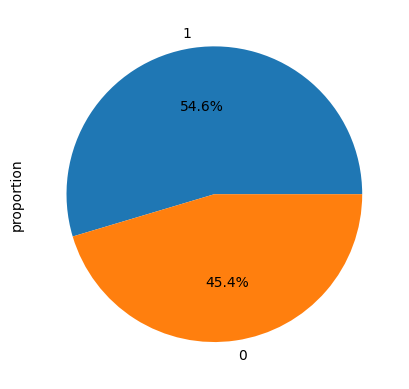

In [ ]:
df['¿Complicación?'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

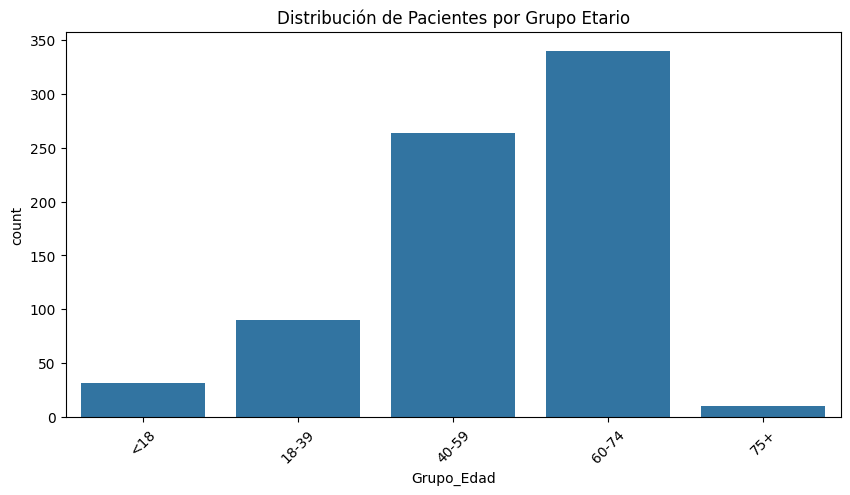

In [92]:
### 

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Grupo_Edad' )
plt.xticks(rotation=45)
plt.title("Distribución de Pacientes por Grupo Etario")
plt.show()

In [93]:

df["Sobrevida_PeriQx_30_días_POP"].value_counts()    

Sobrevida_PeriQx_30_días_POP
1.0    646
0.0     56
Name: count, dtype: int64

In [94]:
df["Sobrevida_PeriQx_30_días_POP"].value_counts(normalize=True)    

Sobrevida_PeriQx_30_días_POP
1.0    0.920228
0.0    0.079772
Name: proportion, dtype: float64

Podemos evidenciar que el 92 % de los pacientes presentan sobrevida positiva en el primer mes postoperatorio

In [95]:
df[["Ecocardiograma_POP_PASP","¿Complicación?"]].loc[(df["Ecocardiograma_POP_PASP"]!= 0) & df["Ecocardiograma_POP_PASP"].notna()]

,Ecocardiograma_POP_PASP,¿Complicación?
54,50.0,1
129,33.0,1
155,27.0,0
545,31.0,0
619,24.0,1
632,38.0,0
636,38.0,0
637,40.0,0
638,21.0,0
668,72.0,1


In [96]:
df["Ecocardiograma_POP_PASP"].loc[df["Ecocardiograma_POP_PASP"]!= 0].describe()

count    10.000000
mean     37.400000
std      14.833895
min      21.000000
25%      28.000000
50%      35.500000
75%      39.500000
max      72.000000
Name: Ecocardiograma_POP_PASP, dtype: float64

Se registran solo 10 pacientes con datos en ecocardiograma, de ello se puede evidenciar que la media es de 37 unidades, lo cual segun su definición es una presión normal. Sin embargo el dato también muestra pacientes con presiones por encima de los 39.5, lo cual puede entenderse como una muestra de hipertensión pulmonar

#### Trombosis_Porta_Tumoral
"presencia de un trombo (coágulo) dentro de la vena porta asociado a invasión tumoral
Pre Trasplante"

In [97]:
df["Trombosis_Porta_Tumoral"].value_counts()

Trombosis_Porta_Tumoral
0.0    188
1.0     31
Name: count, dtype: int64

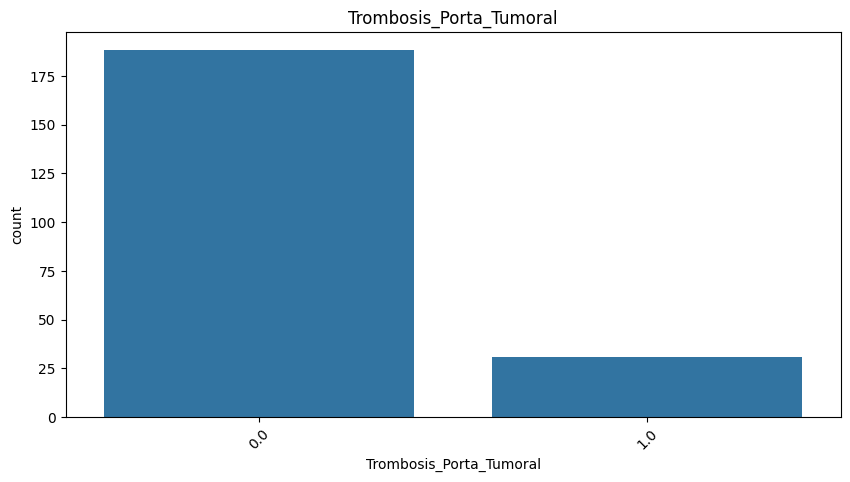

In [119]:
# tipo de reserva según lead_time
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Trombosis_Porta_Tumoral')
plt.xticks(rotation=45)
plt.title("Trombosis_Porta_Tumoral")
plt.show()

Dentro del grupo de pacientes que cuentan con la evaluación de presencia de trombosis, solo 31 evidenciaron presencia de Trombosis en la vena Portal.

#### Inmunosupresión_con_Anticuerpos

El tratamiento inmunosupresior puede usarse antes de la cirugia como despues.Puede usarse como tratamiento de respuesta al rechazo o como terapia preventiva al mismo.

In [98]:
df["Tuvo_Inmunosupresión_con_Anticuerpos"].value_counts()

Tuvo_Inmunosupresión_con_Anticuerpos
NO    172
SI     56
Name: count, dtype: int64

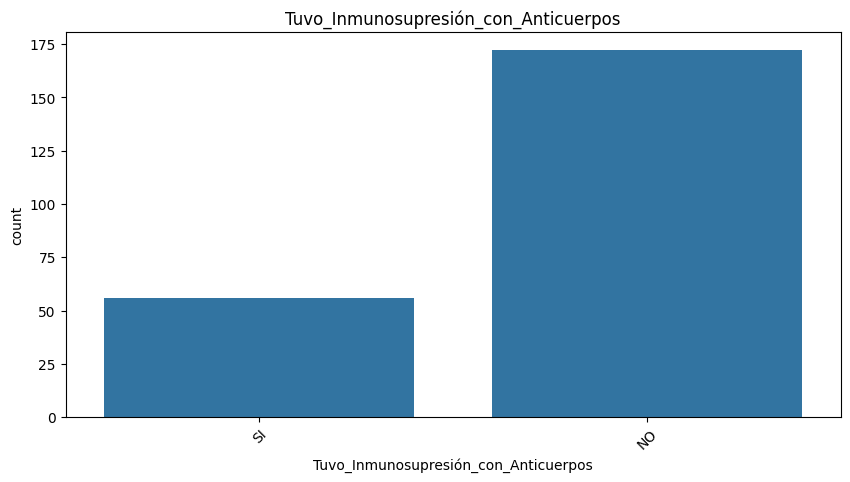

In [99]:
# tipo de reserva según lead_time
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Tuvo_Inmunosupresión_con_Anticuerpos')
plt.xticks(rotation=45)
plt.title("Tuvo_Inmunosupresión_con_Anticuerpos")
plt.show()

En la base de datos analizada, 56 pacientes recibieron inmunosupresión con anticuerpos, mientras que 172 no la recibieron

####  AFP_categoria

In [100]:
df["AFP_categoria"].value_counts()

AFP_categoria
Normal (<10)                   165
Elevación leve (10–100)         53
Alta sospecha (>200)            11
Diagnóstico probable (>400)     10
Indeterminado (100–200)          4
Alta carga tumoral (>1000)       2
Name: count, dtype: int64

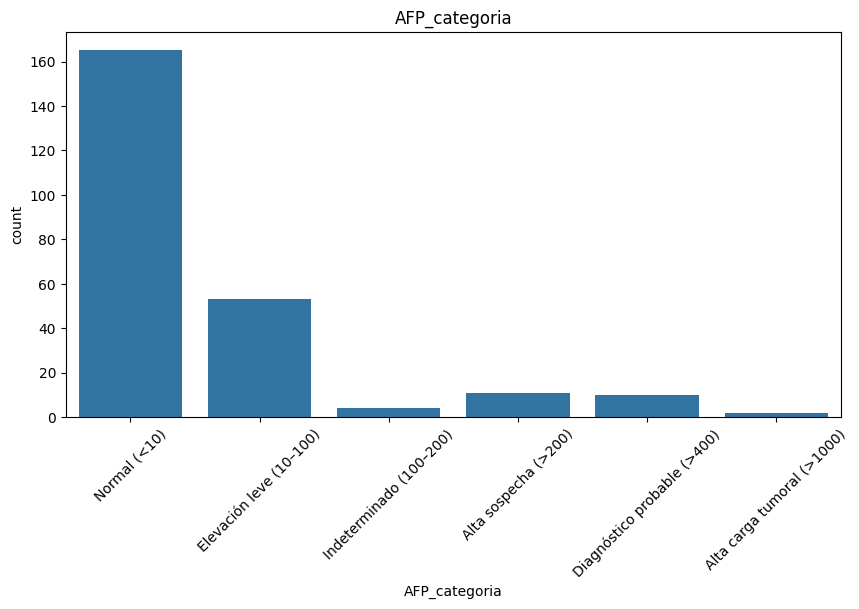

In [101]:
# tipo de reserva según lead_time
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='AFP_categoria')
plt.xticks(rotation=45)
plt.title("AFP_categoria")
plt.show()

En su mayoria los pacientestienen presencia de Alfa-Fetoprotenia en rangos considerados normales. Sin embargo se logran identificar pacientes con altas suspechas, diagnosticos probables y también con alta carga tumoral

#### αFP_Al_Dx 
Alfa-fetoproteína (AFP) al momendo del diagnostico (marcador tumoral)

In [102]:
df["αFP_Al_Dx"].describe()


count     245.000000
mean       59.458449
std       188.843439
min         0.900000
25%         3.400000
50%         6.000000
75%        15.370000
max      1924.000000
Name: αFP_Al_Dx, dtype: float64

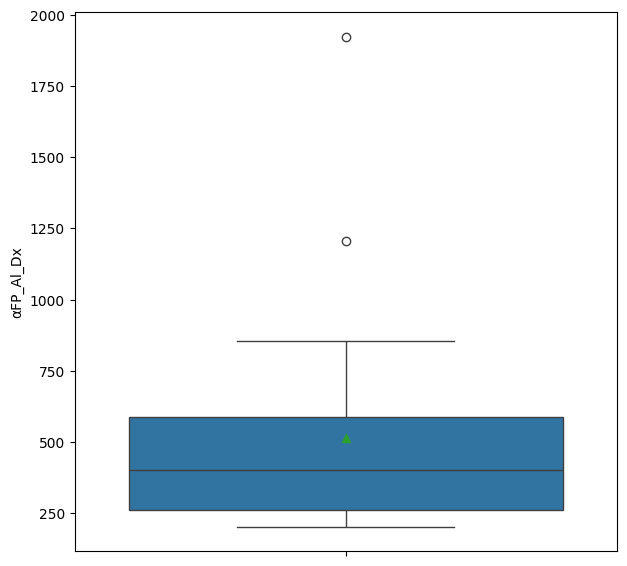

In [103]:
# boxPlot lead_time
plt.figure(figsize=(7, 7))
sns.boxplot(
    data=df.loc[(df['αFP_Al_Dx']> 200)],
    y='αFP_Al_Dx',
    showmeans=True
)
plt.show()

El 75% de los pacientes tienen valores inferiores a 15.37 ng/mL, mientras que el valor máximo (1924 ng/mL) representa un caso extremo con diagnóstico confirmado de Hepatocarcinoma (HCC).

Al tomar los pacientes dentro de los grupos relevantes, que son aquellos con valores de la proteina superiores a 200, podemos evidenciar que la media esta al rededor de las 500 unidades, lo cual ya es indicativo de presencia de cancer. También se evidencian los pacientes atipicos con un diagnostico de hepatocarcinoma comprobado con valores superiores a 1000 unidades. 

#### Grado_HCC:
Clasifica el hepatocarcinoma según el grado de diferenciación celular del tumor, siendo un indicador histológico de agresividad. 

   1: "Bien diferenciado" <br/>
    2: "Moderadamente diferenciado", <br/>
    3: "Poco diferenciado", <br/>
    4: "Indiferenciado" 
   

In [104]:
df["Grado_HCC"].value_counts()



Grado_HCC
2.0    49
3.0    40
4.0     6
1.0     4
Name: count, dtype: int64

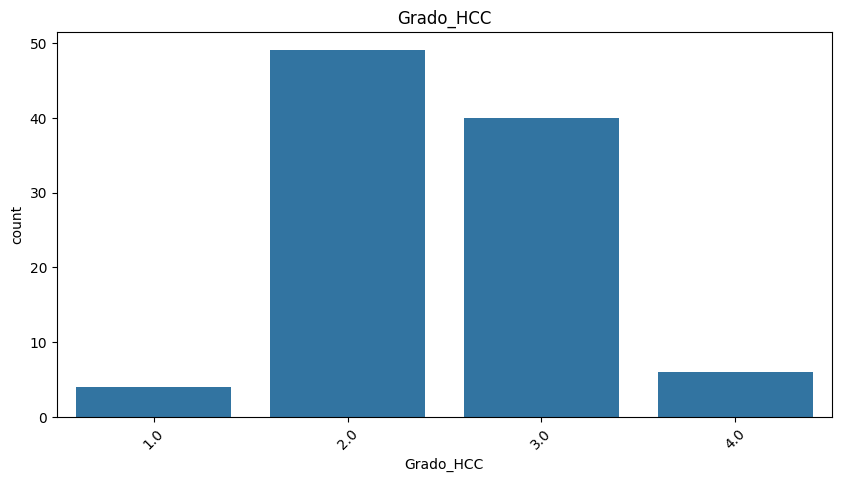

In [105]:
# tipo de reserva según lead_time
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Grado_HCC')
plt.xticks(rotation=45)
plt.title("Grado_HCC")
plt.show()

De los 99 pacientes con diagnóstico confirmado de hepatocarcinoma, la mayoría presenta un grado 2, lo cual indica una diferenciación celular moderada, es decir, las células cancerosas aún conservan ciertas características de las células hepáticas normales.
Sin embargo, un grupo importante de pacientes (grados 3 y 4) exhibe poca o nula diferenciación, lo que se asocia con tumores más agresivos y con peor pronóstico clínico.

#### Estadio

In [106]:
df["Estadio"].value_counts()


Estadio
ESTADIO 1    53
ESTADIO 2    37
ESTADIO 3     8
ESTADIO 4     1
Name: count, dtype: int64

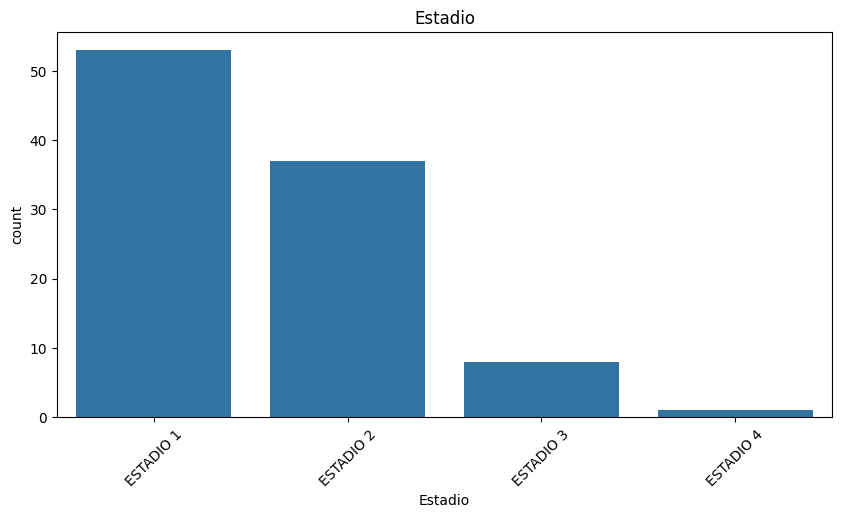

In [107]:
# tipo de reserva según lead_time
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Estadio', order=['ESTADIO 1','ESTADIO 2','ESTADIO 3','ESTADIO 4'])
plt.xticks(rotation=45)
plt.title("Estadio")
plt.show()

1: Tumor pequeño y localizado, sin ganglios afectados ni metástasis. <br/>
2: Tumor un poco mas grande o con invasion mínima, pero aun localizado. <br/>
3: Tumor grande o con invasión vascular, sin ganglios ni metástasis. <br/>
4: Tumor que invade estructuras adyacentes. <br/>

Los pacientes que el diagnostico del Estadio, en su mayoria presentan un tumor pequeño y  localizado, lo que puede sugiere una detección temprana. Mientras que los pacientes que presentan tumores grandes o invasivos se presentan como un grupo menor en la muestra.

### BIVARIADO Y PRUEBA DE HIPOTESIS

#### Trombosis_Porta_Tumoral vs Complicación

In [111]:
ct = pd.crosstab(df['Trombosis_Porta_Tumoral'], df['¿Complicación?'], normalize='index')

pd.crosstab(df['Trombosis_Porta_Tumoral'], df['¿Complicación?'], normalize='index')

¿Complicación?,0,1
Trombosis_Porta_Tumoral,,
0.0,0.414894,0.585106
1.0,0.419355,0.580645


Teniendo en cuenta que solo 31 pacientes presentan esta condición de tener un coagulo en la vena porta, se puede evidenciar que aparentemente esta condición no implica necesariamente una complicación dado que el 41% de los pacientes que presentaron este diagnostico, no presentaron complicaciones. Ademas de que las complicaciones en ambos grupos (tanto los que tuvieron un diagnostico de trombosis como los que no) la proporción de complicaciones es la misma, de un 58% 

H₀ (nula): No existe asociación entre la presencia de trombosis portal tumoral y la ocurrencia de complicaciones postrasplante. <br/>
H₁ (alternativa): Existe asociación entre ambas variables.

In [120]:
from scipy.stats import chi2_contingency

tabla = pd.crosstab(df['Trombosis_Porta_Tumoral'], df['¿Complicación?'])
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"Chi2: {chi2:.3f}, p-valor: {p:.3f}")

Chi2: 0.000, p-valor: 1.000


Dado que el p valor es mayor que 0,05 se puede concluir que no se rechaza la hipotesis nula, mostrando asi que no hay evidencia estadisticamente significativa de la asociación entre complicaciones y trombosis en la vena portal. 

<span style="color:red"> Aunque clínicamente la trombosis portal tumoral podría asociarse con un mayor riesgo de complicaciones por la afectación vascular, los resultados descriptivos no muestran diferencias contundentes entre los grupos.<span/>

#### Tuvo_Inmunosupresión_con_Anticuerpos vs Complicacion

In [112]:
ct = pd.crosstab(df['Tuvo_Inmunosupresión_con_Anticuerpos'], df['¿Complicación?'], normalize='index')

pd.crosstab(df['Tuvo_Inmunosupresión_con_Anticuerpos'], df['¿Complicación?'], normalize='index')

¿Complicación?,0,1
Tuvo_Inmunosupresión_con_Anticuerpos,,
NO,0.459302,0.540698
SI,0.392857,0.607143


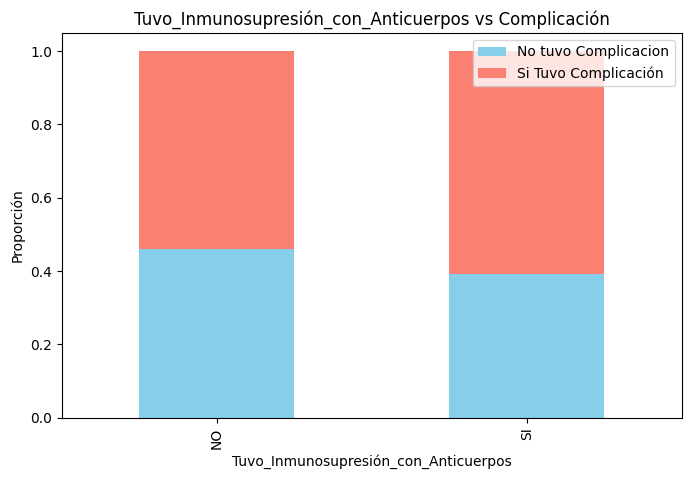

In [113]:
ct.plot(kind='bar', stacked=True, figsize=(8,5), color=['skyblue', 'salmon'])
plt.ylabel("Proporción")
plt.xlabel("Tuvo_Inmunosupresión_con_Anticuerpos")
plt.legend(["No tuvo Complicacion", "Si Tuvo Complicación"], loc="upper right")
plt.title("Tuvo_Inmunosupresión_con_Anticuerpos vs Complicación")
plt.show()

El 60.7% de los pacientes que recibieron inmunosupresión con anticuerpos presentaron alguna complicación postrasplante.

En contraste, el 54% de los pacientes sin tratamiento inmunosupresor también presentaron complicaciones.

Si bien la proporción es mayor en los tratados, la diferencia no parece marcadamente amplia, lo cual sugiere que las complicaciones podrían no depender exclusivamente del uso del tratamiento inmunosupresor, sino del estado clínico previo y del motivo de su administración (prevención vs. respuesta a rechazo).

H₀ (nula): No existe asociación entre el uso de inmunosupresores con anticuerpos y las complicaciones postrasplante.

H₁ (alternativa): Existe asociación entre ambas variables.

In [ ]:

tabla = pd.crosstab(df['Tuvo_Inmunosupresión_con_Anticuerpos'], df['¿Complicación?'])
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"Chi2: {chi2:.3f}, p-valor: {p:.3f}")


Chi2: 0.511, p-valor: 0.475


Dado que el p valor es mayor a 0,05 no se rechaza la hipotesis nula, lo que concluye que no hay evidencia estadisticamente significativa de la asociacion entre el tratamiento con inmunosupresores (Tuvo_Inmunosupresión_con_Anticuerpos) y la presencia de complicaciones.

#### αFP_Al_Dx vs Complicacion

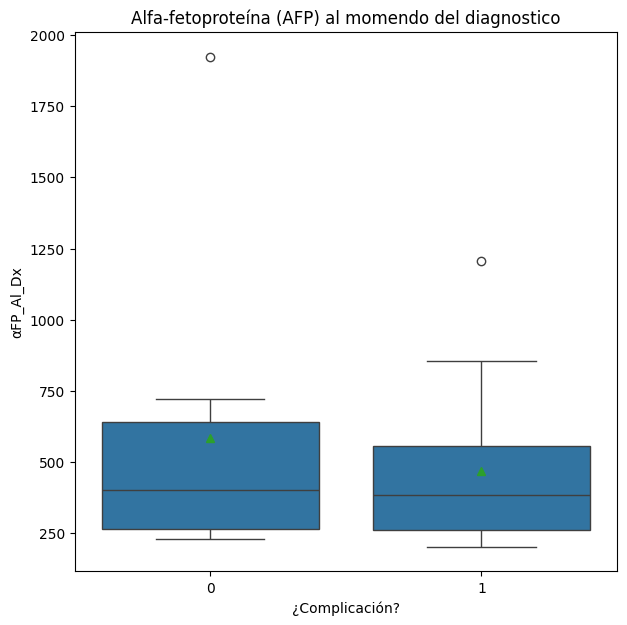

In [126]:
plt.figure(figsize=(7, 7))
sns.boxplot(
    x='¿Complicación?',
    y='αFP_Al_Dx',
    data=df.loc[df['αFP_Al_Dx'] >200],  #
    showmeans=True
)
plt.title("Alfa-fetoproteína (AFP) al momendo del diagnostico")
plt.xlabel("¿Complicación?")
plt.ylabel("αFP_Al_Dx")
plt.show()

Para explorar la relación entre los niveles de AFP y la presencia de complicaciones, se analizaron los pacientes con valores superiores a 200 ng/mL, considerados clínicamente relevantes como indicativos de tumor activo.
El boxplot comparativo muestra que las medias de AFP en los grupos con y sin complicaciones son similares, y que el valor más extremo de AFP se presenta, incluso, en pacientes que no desarrollaron complicaciones postrasplante.

Esto sugiere que, aunque niveles altos de AFP reflejan una mayor carga tumoral o un estadio más avanzado del carcinoma hepatocelular, no se evidencia una asociación directa con la aparición de complicaciones en el contexto postrasplante.

H₀: No existe diferencia significativa en los valores de AFP entre pacientes con y sin complicaciones.

H₁: Existe una diferencia significativa en los valores de AFP entre ambos grupos.

In [128]:
import scipy.stats as stats

# Filtrar los grupos según si tuvieron o no complicaciones
grupo_sin_comp = df[df["¿Complicación?"] == 0]["αFP_Al_Dx"].dropna()
grupo_con_comp = df[df["¿Complicación?"] == 1]["αFP_Al_Dx"].dropna()

# Aplicar prueba de Mann-Whitney U (no paramétrica)
stat, p_value = stats.mannwhitneyu(grupo_sin_comp, grupo_con_comp, alternative='two-sided')

print("📊 Resultado prueba Mann-Whitney U")
print(f"Estadístico U: {stat:.2f}")
print(f"Valor p: {p_value:.4f}")


📊 Resultado prueba Mann-Whitney U
Estadístico U: 7483.00
Valor p: 0.7569


Dado que el p valor es superior a 0,05 podemos concluir que no hay evidencia suficiente para afirmar que los valores de AFP difieran entre los grupos con y sin complicaciones. No hay diferencia significativa entre los valores de AFP para pacientes con complicaciones vs sin complicaciones

#### Grado_HCC vs Complicacion

In [115]:
pd.crosstab(df["Grado_HCC"], df["¿Complicación?"], normalize='index') 

¿Complicación?,0,1
Grado_HCC,,
1.0,0.500000,0.500000
2.0,0.448980,0.551020
3.0,0.225000,0.775000
4.0,0.333333,0.666667


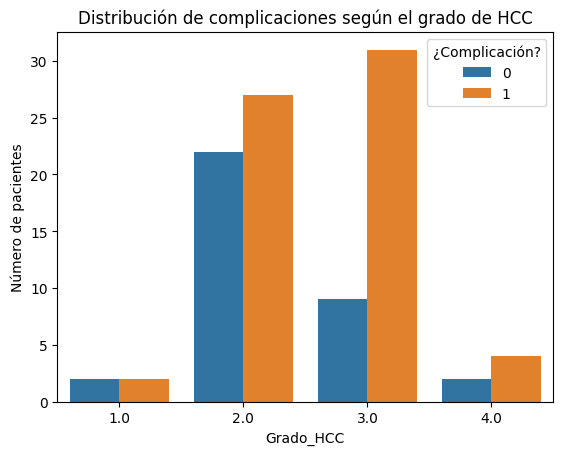

In [116]:
sns.countplot(data=df_trans_hepatico, x="Grado_HCC", hue="¿Complicación?")
plt.title("Distribución de complicaciones según el grado de HCC")
plt.ylabel("Número de pacientes")
plt.show()

<span style="color:red"> Se observa una tendencia ascendente: los pacientes con grados más avanzados presentan una mayor proporción de complicaciones postrasplante.<span/>

En el grado I, el 50 % de los pacientes tuvo complicaciones, mientras que en el grado III la proporción asciende al 77.5 % y en el grado IV al 66.7 %.

Este comportamiento sugiere que la severidad histológica del tumor podría estar asociada con un mayor riesgo de eventos adversos tras el trasplante.


H₀ (nula): No existe relación entre el grado histológico del hepatocarcinoma y la presencia de complicaciones postrasplante.

H₁ (alternativa): Existe una relación entre el grado histológico del hepatocarcinoma y la presencia de complicaciones postrasplante.

In [130]:
# Prueba de Chi-cuadrado
tabla = pd.crosstab(df["Grado_HCC"], df["¿Complicación?"])
chi2, p_value, dof, expected = stats.chi2_contingency(tabla)

print(f"\nChi-cuadrado: {chi2:.3f}")
print(f"p-valor: {p_value:.4f}")


Chi-cuadrado: 5.231
p-valor: 0.1557


A pesar de que se identificó una tendencia ascendente en donde a medida que aumenta el Grado_HCC se incrementa la proporción  de pacientes con complicacion, la prueba de hipotesis arroja un p value superior a 0,05, por lo cual no se tiene evidencia suficiente para afirmar una relación estadisticamente significativa.

#### Estadio

In [117]:
pd.crosstab(df["Estadio"], df["¿Complicación?"], normalize='index') 

¿Complicación?,0,1
Estadio,,
ESTADIO 1,0.433962,0.566038
ESTADIO 2,0.297297,0.702703
ESTADIO 3,0.125000,0.875000
ESTADIO 4,0.000000,1.000000


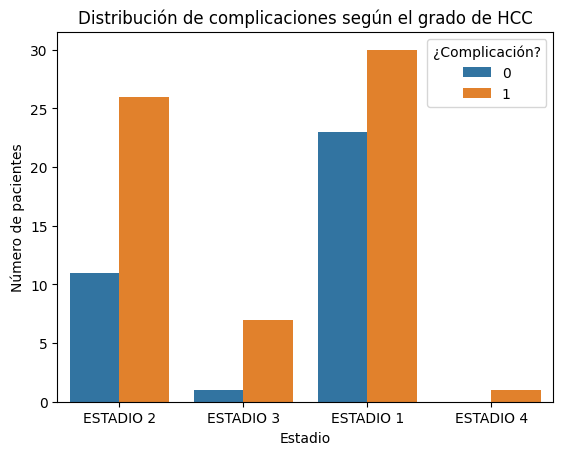

In [118]:
sns.countplot(data=df_trans_hepatico, x="Estadio", hue="¿Complicación?")
plt.title("Distribución de complicaciones según el grado de HCC")
plt.ylabel("Número de pacientes")
plt.show()

Se puede evidenciar que a medida que el tumor es mas invasivo, se presentan mas complicaciones en el paciente dado que 

En el estadio 1, poco más de la mitad presenta complicaciones (56.6%). <br/>
En el estadio 2, las complicaciones suben a 70%. <br/>
En el estadio 3, casi el 90% presenta complicaciones. <br/>
En el estadio 4, todos los pacientes tuvieron complicaciones. <br/>



H₀ (nula): No existe asociación entre el estadio del hepatocarcinoma y la presencia de complicaciones postrasplante.

H₁ (alternativa): Existe una asociación entre el estadio del hepatocarcinoma y la presencia de complicaciones postrasplante

In [131]:
# Prueba Chi-cuadrado
tabla = pd.crosstab(df["Estadio"], df["¿Complicación?"])
chi2, p_value, dof, expected = stats.chi2_contingency(tabla)

print(f"\nChi-cuadrado: {chi2:.3f}")
print(f"p-valor: {p_value:.4f}")


Chi-cuadrado: 4.387
p-valor: 0.2226


Dado que el p valor es superior a 0,05 no es posible rechazar la hipotesis nula, por lo cual se acepta que no existe asociacion estadisticamente significativa entre el estadio y las complicaciones.

#### Conclusion 

A pesar de que las variables Trombosis_Porta_Tumoral ,Tuvo_Inmunosupresión_con_Anticuerpos, αFP_Al_Dx, Grado_HCC y Estadio no presentaron relevancia estadisticamente significativa, cabe aclarar que esto no implica que la relación no sea real. 

Se resalta que variables como Grado_HCC y Estadio presentan una tendencia significatica al presentar mayor proporción de complicaciones conforme aumenta su grado. 

Se plantea continuar con un analisis multivariado que permita identificar combinaciones de factores que puedan influir en las complicaciones, con eso se podrá tratar el efecto aislado que presentamos aqui de cada variable